In [1]:
### [Environment setting]
from __future__ import print_function


In [2]:
## 0. Basics
import re
import math
import copy
import random
import datetime, time
from operator import add
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
from IPython.display import YouTubeVideo

In [3]:
# skipping cells with a long runtime, if True
fast = False

In [4]:
# runtime checker
start_log = datetime.now()

In [5]:
## 1. Data Science
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot as plt
import seaborn as sns
from plotnine import *
from glob import glob
import missingno as msno
import folium
# import plotly.offline as offline
# import plotly.graph_objs as go

In [8]:
!pip3 install plotnine

    99% |████████████████████████████████| 4.4MB 155kB/s eta 0:00:01   3% |█▏                              | 153kB 118kB/s eta 0:00:36    86% |███████████████████████████▌    | 3.8MB 57kB/s eta 0:00:11    100% |████████████████████████████████| 4.4MB 110kB/s 
    100% |████████████████████████████████| 8.7MB 54kB/s ta 0:00:013    21% |███████                         | 1.9MB 94kB/s eta 0:01:13    24% |███████▉                        | 2.1MB 48kB/s eta 0:02:16    58% |██████████████████▉             | 5.1MB 88kB/s eta 0:00:41    62% |████████████████████            | 5.4MB 117kB/s eta 0:00:28    97% |███████████████████████████████▏| 8.4MB 81kB/s eta 0:00:03
    100% |████████████████████████████████| 235kB 177kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/b3/a9/b1bc4c935ed063766bce7d3e8c7b20bd52e515ff1c732b02caacf7918e5a/numpy-1.18.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37

In [8]:
## 2. Statistics
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats

In [9]:
## 3. Forecasting
from pandas.plotting import autocorrelation_plot as acplot
from statsmodels.tsa.arima.model import ARIMA
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [11]:
!pip3 install fbprophet

    100% |████████████████████████████████| 61kB 317kB/s ta 0:00:01
    100% |████████████████████████████████| 2.0MB 425kB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 1.7MB/s ta 0:00:011
    100% |████████████████████████████████| 112kB 4.2MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/93/4b/52da6b1523d5139d04e02d9e26ceda6146b48f2a4e5d2abfdf1c7bac8c40/matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b3/a9/b1bc4c935ed063766bce7d3e8c7b20bd52e515ff1c732b02caacf7918e5a/numpy-1.18.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8e/86/c14387d6813ebadb7bf61b9ad270ffff111c8b587e4d266e07de774e385e/pandas-1.0.4-cp36-cp36m-manylinux1_x86_64.whl
    99% |████████████████████████████████| 67.2MB 1.0MB/s eta 0:00:01210% |                                | 133kB 3.4MB/s eta 0:00:20    4% |█▎                              | 2.7MB 51.8MB/s eta 0:00:02    23% |██████

  Running setup.py bdist_wheel for ephem ... done
  Stored in directory: /home/spark/.cache/pip/wheels/14/4c/de/9e07d9cdc466db80537dbebfd8af892da8c8ffbd8019d85db8
  Running setup.py bdist_wheel for pymeeus ... done
  Stored in directory: /home/spark/.cache/pip/wheels/8d/1a/e7/684cd77a99aac294f976db834fe613b5424f7c4d75ffb0b84d
Successfully built holidays ephem pymeeus
Failed to build fbprophet
  Running setup.py install for fbprophet ... done


In [10]:
## 4. Machine Learning
import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, r2_score

In [11]:
## 5. Plots & Fonts
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (13, 7)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
color_list = ['#8DD3C7', '#FEFFB3', '#BFBBD9'
              , '#FA8174', '#81B1D2', '#FDB462'
              , '#B3DE69', '#BC82BD', '#CCEBC4']

In [77]:
## Get data
import os
last_update = '2020-06-01'
print(f'[Dataset list]\n# updated on %s'%last_update)
file_paths_raw = []
for dirname, _, filenames in os.walk('/home/spark/바탕화면/BigData_Analysis/Project/dataset'):
    for filename in filenames:
        file_paths_raw.append(os.path.join(dirname, filename))
file_names = ['TimeAge.csv', 'TimeProvince.csv', 'Region.csv', 'TimeGender.csv'
              , 'Time.csv', 'Case.csv', 'Weather.csv', 'PatientInfo.csv'
              , 'PatientRoute.csv', 'SeoulFloating.csv', 'SearchTrend.csv', 'Policy.csv']
file_paths = [ j for i in file_names for j in file_paths_raw if i in j ]
file_paths

[Dataset list]
# updated on 2020-06-01


['/home/spark/바탕화면/BigData_Analysis/Project/dataset/TimeAge.csv',
 '/home/spark/바탕화면/BigData_Analysis/Project/dataset/TimeProvince.csv',
 '/home/spark/바탕화면/BigData_Analysis/Project/dataset/Region.csv',
 '/home/spark/바탕화면/BigData_Analysis/Project/dataset/TimeGender.csv',
 '/home/spark/바탕화면/BigData_Analysis/Project/dataset/Time.csv',
 '/home/spark/바탕화면/BigData_Analysis/Project/dataset/Case.csv',
 '/home/spark/바탕화면/BigData_Analysis/Project/dataset/Weather.csv',
 '/home/spark/바탕화면/BigData_Analysis/Project/dataset/SearchTrend.csv']

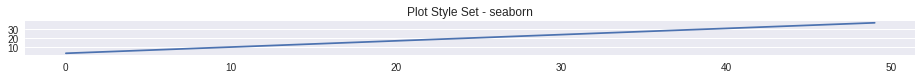

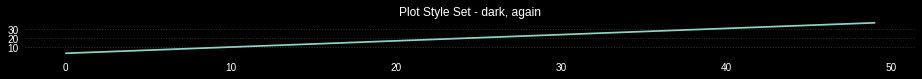

In [18]:
### [Functions]

def get_data(path, transpose=False):
    """
    FUNCTION
        to get and check data from a file path
    @ PARAMS
        path(string) = file path for data
        transpose(bool) = transpose a wide data to show vertically / default=False
    > RETURN
        df_raw = dataframe
    """
    df_raw = pd.read_csv(path)
    print('[Sample data]')
    if transpose:
        display(df_raw.head(3).append(df_raw.tail(3)).T)
    else:
        display(df_raw.head(3).append(df_raw.tail(3)))
    return df_raw

def data_range(data, column, describe=None):
    """
    FUNCTION
        to check date range of time series or scarce chronological data
    @ PARAMS
        data(dataframe) = data to check
        column(string) = column name for date
        describe(string) = additional description on date column
                           e.g. starting_date
    > RETURN
        None
    """
    data_col = pd.to_datetime(data[column]).dt.date
    date_range = (max(data_col) - min(data_col)).days + 1
    if describe==None:
        print(f'Date range: {date_range} days')
    else:
        print(f'Date range ({describe}): {date_range} days')
    print(f'# {min(data_col)} to {max(data_col)}')
    return None


## [Refactor point] handle multiple subplots in 1 figure
def plot_groupby(data, groupby, column, title, ylabel=None, axis=None):
    """
    FUCNTION
        to plot data after grouping by a column
    @ PARAMS
        data = dataframe to plot
        groupby(string) = column name for grouping
        column(string) = column name for y axis
        title(string) = plot title
        axis = specific axis to plot on
    > RETURN
        None
    """
    fig, ax = plt.subplots(figsize=(13, 7))
    plt.title(f'{title}', fontsize=17)
    ax.set_xlabel('Date', size=13)
    if ylabel == None:
        ax.set_ylabel('Number of cases', size=13)
    else:
        ax.set_ylabel(ylabel, size=13)
    group_list = data.groupby(groupby)
    for group in group_list:
        if axis == None:
            plt.plot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
        else:
            axis.plot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
        """ Code Performance
        0. Without .values
            - 558 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
            - 537 ms ± 27.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
            - 587 ms ± 34.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
        1. With .values 
            - 508 ms ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
            - 515 ms ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
            - 540 ms ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
        """
    tick_num = 12
    ax.set_xticks(ax.get_xticks()[::int(len(age_raw.date.unique())/tick_num)+1])
    ax.legend()
    plt.show()

 
def plot_lines(data, column_list, column_max, title):
    """
    FUCNTION
        to show many plots with combinations of lines with consistent colors and legend
        useful for plotting lines with different scales at once and then separately
    @ PARAMS
        data = dataframe to plot
        column_list = columns to have numeric values, each can be the initial column to plot up to column_max
        column_max = the last column to plot from the initial column in column_list for len(column_list)
        title(string) = plot title
    > RETURN
        None
    """
    for i in column_list:
        fig, ax = plt.subplots(figsize=(13, 7))
        plt.title(f'{title}', fontsize=17)
        color_group = color_list[:-4][-(column_max-i):]
        for test_each, color_each in zip(data.columns[i:column_max], color_group):
            plt.plot(data.date, data[test_each]
                     , label=test_each, color=color_each
                    )
            label=data[test_each]
        ax.set_xticks(ax.get_xticks()[::int(len(data.date)/8)])
        plt.xlabel('Date', size=13)
        plt.ylabel('Number of cases', size=13)
        ax.legend(loc='upper left')
        plt.show()


def split_fit_pred(X, y, model, test_size=0.3, random_state=13, classification=False):
    """
    Function
        to split data into training/test sets, fit a model, and predict with them in one-shot manner
    @params 
        X = independent variables
        y = dependent variable
        model = model to train
        test_size = size of test set / 0<s<1 / default=0.3
        random_state = random seed for stable testing results / default=13
        classification = if classification, split X with stratifying y labels / default=False(linear)
    >return
        model = a fitted model
        prediction = predictions by the model
        train_score = a score by the predictions in training
        test_score = a score by the predictions in test
    """
    # Split
    if classification == True:
        X_train, X_test, y_train, y_test = train_test_split(X, y
                                                            , stratify = y
                                                            , test_size = test_size
                                                            , random_state = random_state)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y
                                                            , test_size = test_size
                                                            , random_state = random_state)
    # Fit & validate
    model.fit(X_train, y_train)
    prediction = model.predict(X_test);
    train_score, test_score = model.score(X_train, y_train), model.score(X_test, y_test)
    return model, prediction, train_score, test_score


def test_with_range(X, y, model, size_range, random_state=13):
    """
    Function
        to test a model with various test set sizes
    @params
        X = independent variables
        y = dependent variable
        model = model to train
        size_range = the range of test sets size to experiment with / 0<s<1
        random_state = random seed for stable testing results / default=13
    @return
        train_list = list of training scores by speicifc value in the given range
        test_list = list of test scores by speicifc value in the given range
        best_test_size = the best size with the best score in test_list
    """
    plt.title(f'Score by Test Set Size (random seed={random_state})', size=17)
    train_list, test_list = list(), list()
    for s in size_range:
        model, prediction, train_score, test_score = split_fit_pred(X, y, model, random_state=random_state, test_size=s)
        train_list.append(train_score); test_list.append(test_score)
    # train_list, test_list
    plt.plot(size_range, train_list)
    plt.plot(size_range, test_list)
    plt.legend(['train_score', 'test_score'])
    plt.xlabel('Test set size')
    plt.ylabel('Score')
    plt.show()
    best_test_size = size_range[np.nanargmax(test_list)]
    print('Best train score: {} (test set size: {})'
          .format(round(np.nanmax(train_list), 2), round(size_range[np.nanargmax(train_list)], 2)))
    print('Best test score: {} (test set size: {})'
          .format(round(np.nanmax(test_list), 2), round(best_test_size, 2)))
    return train_list, test_list, best_test_size


## [Refactor point] need to be merged into test_with_range() as both share a lot except for data type
def test_with_range_ts(X, y, model, size_range, variable):
    """
    Function
        to test a model with various sizes on time series data
    @params 
        X = independent variables
        y = dependent variable
        model = model to train
        size_range = the range of test sets size to experiment with / 0<s<1
        random_state = random seed for stable testing results / default=13
    >return
        train_list = list of training scores by speicifc value in the given range
        test_list = list of test scores by speicifc value in the given range
        best_test_size = the best size with the best score in test_list
    """
    X = np.array(X).reshape(-1, 1)
    train_list, test_list, pred_list = list(), list(), list()
    for i in size_range:
        X_train, X_test, y_train, y_test = X[:-i, :], X[-i:, :], y[:-i], y[-i:]
        model.fit(X_train, y_train)
        train_pred = list(model.predict(X_train))
        test_pred = list(model.predict(X_test))
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        train_list.append(train_score)
        test_list.append(test_score)
        pred_list.append(train_pred + test_pred)
    plt.figure(figsize=(13, 7))
    plt.title(f'Score by Test Set Size (%s)'%variable, size=17)
    plt.plot(size_range/len(X), train_list)
    plt.plot(size_range/len(X), test_list)
    plt.legend(['Training score', 'Test score'])
    plt.xlabel('Test set size')
    plt.ylabel('Score')
    plt.show()
    best_score = np.nanmax(test_list)
    best_size = size_range[np.nanargmax(test_list)]
    best_pred = pred_list[np.nanargmax(test_list)]
    print(f'Best training score: %.4f (test set size=%.2f)'%(np.nanmax(train_list)
                                                          , size_range[np.nanargmax(train_list)]/len(X)))
    print(f'Best test score: %.4f (test set size=%.2f)'%(np.nanmax(test_list)
                                                       , best_size/len(X)))
    return train_list, test_list, best_pred, best_score, best_size


def get_recent_to_max(data, group='Country_Region', min_cases=1, recent_window=3, max_num=1):
    """
    FUNCTION 
        to convert raw data with cases by subregion into with that by country
        to add a column measuring which phase of spreading a country is in
            recent_to_max = n latest observation (3 latest, in case the last is 0) 
                            divided by
                            max daily case of a country
    @ PARAMS 
        data = data to convert
        group = criterion for grouping target values
        min_caes = minimum number of cases in a country to be listed /default=1
        recent_window = how many observations to apply in recent_to_max calculation / default=3
        max_num = number of max values to be averaged (1st max, 2nd max, ..., Nth max) / default=1
    > RETURN 
        rtm_df = DataFrame with columns of total_cases and recent_to_max (indexed by country)
        data_group = DataFrame grouped by group column
    """
    ## 1. Get source data by country / set dictionary to save total cases and recent_to_max
    data_group = data.groupby(group)
    total_dict, rtm_dict = dict(), dict()
    for i in data_group:
        if i[1].TargetValue.sum() > min_cases:
            total_dict[i[0]] = i[1].TargetValue.sum()
    ## 2-1. Handle 0 latest cases (for being robust to the exceptional 0 day)
            if i[1].TargetValue.max() in i[1].TargetValue[-recent_window:].values:
                rtm_dict[i[0]] = 1
            else:
    ## 2-2. Average N max values (for being robust to the errorneous max value)
                if max_num > 1:
                    temp = copy.deepcopy(i[1].TargetValue)
                    max_list = list()
                    for j in range(max_num):
                        max_list.append(max(temp))
                        temp.pop(np.argmax(temp))
                    max_val = np.mean(max_list)
                else:
                    max_val = i[1].TargetValue.max()
                rtm_dict[i[0]] = i[1].TargetValue[-recent_window:].mean() / max_val
    ## 3. Get the result dataframe
    rtm_df = pd.DataFrame(np.array([list(total_dict.values()), list(rtm_dict.values())]).T
                          , index = total_dict.keys()
                          , columns = ['total_cases', 'recent_to_max'])
    rtm_df = rtm_df.sort_values('total_cases', ascending=False)
    return rtm_df, data_group


def plot_phase(data_grouped, rtm_df, no_of_country=3, trim=False, scale=False, reverse=False):
    """
    FUNCTION 
        to plot the daily confirmed cases for each country
        to check in which phase (early, middle, late) of spreading it is
    @ PARAMS 
        group = list of time series data grouped by a column
        rtm_df = dataframe with total_cases and recent_to_max columns per country
        no_of_country = number of countries to plot
        trim = starts from the day with 1st case (than the given first)
        scale = scale target values to the max in a given period
        reverse = reverse the given order of index
    > RETURN 
        None
    """
    ## 1. Set list of countries to plot
    if reverse:
        country_list = rtm_df.index[-no_of_country:][::-1]
    else:
        country_list = rtm_df.index[0:no_of_country]
    ## 2. Plot daily cases for each country
    for i, j in zip(country_list, np.arange(1, len(country_list)+1)):
        group = data_grouped.get_group(i)
        if trim:
            # starts from the day with 1st case
            first_case_idx = int(group[group.TargetValue > 0].head(1).index.values)
        else:
            first_case_idx = 0
        group = group.loc[first_case_idx:, :] # loc than iloc
        group = group.groupby('Date').sum()
        group = group.loc[ :, ['TargetValue'] ]
        fig, ax = plt.subplots(figsize=(13, 7))
        plt.title('Daily Confirmed Cases - {0}. {1} (total cases={2}, recent to max={3})'
                  .format(j, i
                          , int(rtm_df.loc[i, "total_cases"])
                          , round(rtm_df.loc[i, "recent_to_max"], 4))
                  , size=17)
        if scale:
            group.TargetValue = group.TargetValue / max(group.TargetValue) * 100
        ax.plot(group.index
                , group.TargetValue)
        ax.set_xticks(ax.get_xticks()[::int(len(group.index)/8)])
        ax.set_xlabel('Confirmed date')
        ax.set_ylabel('Number of cases', size=13)
    return None
    
    
def arima_grid(truth, p_anchor, d_anchor, q_anchor, window):
    """
    FUNCTION
        to grid search for ARIMA model parameters (p, d, q)
    @ PARAMS
        truth = dataframe saving Date and TargetValue columns
        p_anchor, d_anchor, q_anchor = mid point for list of possible parameters
        window = range of extending anchor values (-/+ window applied to each anchor)
    > RETURN
        param_list = list of parameter sets
        mape_list = list of MAPE per each parameter sets
    """
    p_range = np.arange(max(0, p_anchor-window), p_anchor+window+1)
    d_range = np.arange(max(0, d_anchor-window), d_anchor+window+1)
    q_range = np.arange(max(0, q_anchor-window), q_anchor+window+1)
    param_list, mape_list = list(), list()
    for p in p_range:
        for d in d_range:
            for q in q_range:
                arima = ARIMA(truth.TargetValue
                              , dates=truth.Date
                              , order=(p, d, q)
                              , freq="D").fit()
                arima_pred = arima.predict()
                _, _, _, mape = diff_metrics(truth.TargetValue[:-1], arima_pred[1:])
                param_list.append(f'{p}, {d}, {q}')
                mape_list.append(mape)
    plt.plot(param_list, mape_list)
    plt.title('MAPE by parameter set (p, d, q)', size=17)
    plt.xlabel('Parameter set', size=13)
    plt.ylabel('MAPE (Mean Absolute Percentage Error)', size=13)
    plt.xticks(rotation=31)
    plt.show()
    return param_list, mape_list


def do_prophet(data, date_column, y_column
               , benchmark=None, test_size=1
               , is_bench=False, bm_name='best model at present'
               , season_mode='additive', custom_period=False, period=None, num_curve=5
               , simple=True
               ):
    """
    Function 
        to apply Prophet with default parameters
    @Params 
        data = data before being formatted in Prophet manner
        date_column = column name for time steps
        y_column = column name for independent variable
        benchmark = benchmark prediction to plot
        test_size = size for forecasting / 1<s<len(data) / default=1
        is_bench = if is_bench, plot benchmark prediction too / default=True
        bm_name = name (or description) for benchmark method
        sesson_mode = the mode for calculating seasonality / default='additive', optional='multiplicative'
        custom_period = set and use custom period
        period = custom period / format='n days(or other time unit)'
        num_curve = how many curves are allowed / default=5 / the more, the more flexible, prone to overfitting, and time need to fit
        simple = if simple, don't print out intermediate details (only plot the last prediction plot) / default=True
    >return 
        pp = the fitted Prophet model (useful for cross validation)
        predict = the predictions by the model (useful for visualization)
    """
    ## 1. Prepare a dataframe
    forecast_df = data[ [date_column, y_column] ]
    if not simple:
        print('[Raw Data - sample]')
        display(forecast_df.head(3).append(forecast_df.tail(3)))
    forecast_df = data.rename(columns = {date_column: 'ds' # ds: Date Stamp
                                         , y_column: 'y'}) # y: values to forecast
    # forecast_df.ds = pd.to_datetime(forecast_df.ds) # string to datetime
    ## 2. Split
    forecast_train, forecast_test = forecast_df.iloc[:-test_size, :], forecast_df.iloc[-test_size:, :]
    if not simple:
        print(f'Training-set size: %d\nTest-set size: %d\n'%(forecast_train.shape[0], forecast_test.shape[0]))
    ## 3. Fit
    if custom_period:
        pp = Prophet(\
                     seasonality_mode=season_mode
                     , yearly_seasonality=False
                     , weekly_seasonality=False
                     , daily_seasonality=False
                    ).add_seasonality(name='custom'
                                      , period=period
                                      , fourier_order=num_curve)
    else:
        pp = Prophet()
    pp.fit(forecast_train)
    if not simple:
        print('# Prophet model trained\n')
    ## 4. Predict
    frame = pp.make_future_dataframe(periods=test_size)
    predict = pp.predict(frame)
    if not simple:
        print('[Forecasting result - sample]')
        display(predict.tail(3).T)
        print('# yhat = predicted point value')
    ## 5. Plot predictions
    fig, ax = plt.subplots(figsize=(13, 7))
    plt.title('Confirmed Cases Prediction (Prophet)', size=17)
    plt.plot(forecast_df.ds, forecast_df.y
             , color='#33322B', ls=':', lw=3)
    plt.plot(forecast_df.ds, predict.yhat)
    if is_bench:
        plt.plot(forecast_df.ds, benchmark)
    ax.axvline(forecast_df.ds.values[len(forecast_df)-test_size], ls=':', color='crimson')
    ax.set_xticks(ax.get_xticks()[::int(len(forecast_df.ds)/8)])
    if is_bench:
        ax.legend(['Truth'
                   , 'Prediction (Prophet)'
                   , f'Benchmark (%s)'%bm_name
                   , 'Test starts']
                  , fontsize=11
                  , loc='upper left'
                 )
    else:
        ax.legend(['Truth'
                   , 'Prediction (Prophet)'
                   , 'Test starts']
                  , fontsize=11
                  , loc='upper left'
                 )
    plt.xlabel('Confirmed date', size=13)
    plt.ylabel('Number of cases', size=13)
    plt.show()
    return pp, predict


## [Refactor point] need to embrace multi-steps forecasting
def result_df(date, truth, pred):
    """
    FUNCTION 
        to make a dataframe for test results for one-step forecasting
    @ PARAMS 
        date(string) = column name for date
        truth(numeric) = truth value
        pred(numeric) = predicted value
    > RETURN 
        result = result dataframe with 'truth, prediction, difference(truth-prediction)' as columns
    """
    col = ['truth', 'prediction', 'difference']
    result = pd.DataFrame(columns=[col], index=[date])
    result.loc[date, 'truth'] = truth
    result.loc[date, 'prediction'] = pred
    result.loc[date, 'difference'] = abs(truth-pred)
    return result


def diff_metrics(truth, pred):
    """
    FUNCTION
        to calculate difference (predictions-truth) and the performance metrics
    @ PARAMS
        truth(sequences of numeric values) = truth values
        pred(sequences of numeric values) = predicted values
    > RETURN
        diff = pred - truth
        rmse = Root Mean Sqaure Error
        mae = Mean Absolute Error
        mape = Mean Absolute Percentage Error
    """
    diff = np.array(pred) - np.array(truth)
    rmse = np.sqrt(np.mean(diff**2))
    mae = np.mean(np.abs(diff))
    mape = np.mean(np.abs(diff) / (np.array(truth) + 1))
    return diff, rmse, mae, mape


def perform_report(truth, pred):
    """
    FUNCTION
        to get performance report as dataframes (dependent on diff_metrics())
    @ PARAMS
        truth(sequences of numeric values) = truth values
        pred(sequences of numeric values) = predicted values
    > RETURN
        result = dataframe with columns of 'truth, prediction, difference'
        metrics = dataframe with columns of 'rmse, mae, mape'
    """
    diff, rmse, mae, mape = diff_metrics(truth, pred)
    result = pd.DataFrame(
        {'truth': truth
         , 'prediction': pred
         , 'difference': diff}
    )
    metrics = pd.DataFrame(
        {'rmse': rmse
         , 'mae': mae
         , 'mape': mape}
        , index=['score']
    )
    display(result)
    display(metrics)
    return result, metrics


def set_style():
    """
    FUNCTION
        to set color theme with a custom dark, plus additional style settings like figsize
    @ PARAMS
        None
    > RETURN
        None
    """
    plt.style.use('seaborn')
    plt.figure(figsize=(13, 1.3))
    plt.title('Plot Style Set - seaborn')
    plt.plot(np.linspace(np.pi, np.pi**np.pi))
    plt.show()
    plt.style.use('dark_background')
    plt.rcParams['axes.grid.axis'] = 'y'
    plt.rcParams['grid.linestyle'] = ':'
    plt.rcParams['grid.color'] = '#33322B'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['figure.figsize'] = (13, 7)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({'font.size': 13})
    plt.figure(figsize=(13, 1.3))
    plt.title('Plot Style Set - dark, again')
    plt.plot(np.linspace(np.pi, np.pi**np.pi))
    plt.show()
    
set_style()

In [21]:
## 1. Get / Check data
age_raw = get_data(file_paths[0])
data_range(age_raw, 'date')
age_list = age_raw.age.unique()
print('Age groups:', age_list)
print('# 80s == 80s and older')

[Sample data]


date  time  age  confirmed  deceased
0    2020-03-02     0   0s         32         0
1    2020-03-02     0  10s        169         0
2    2020-03-02     0  20s       1235         0
816  2020-05-31     0  60s       1405        39
817  2020-05-31     0  70s        725        80
818  2020-05-31     0  80s        498       131

Date range: 91 days
# 2020-03-02 to 2020-05-31
Age groups: ['0s' '10s' '20s' '30s' '40s' '50s' '60s' '70s' '80s']
# 80s == 80s and older


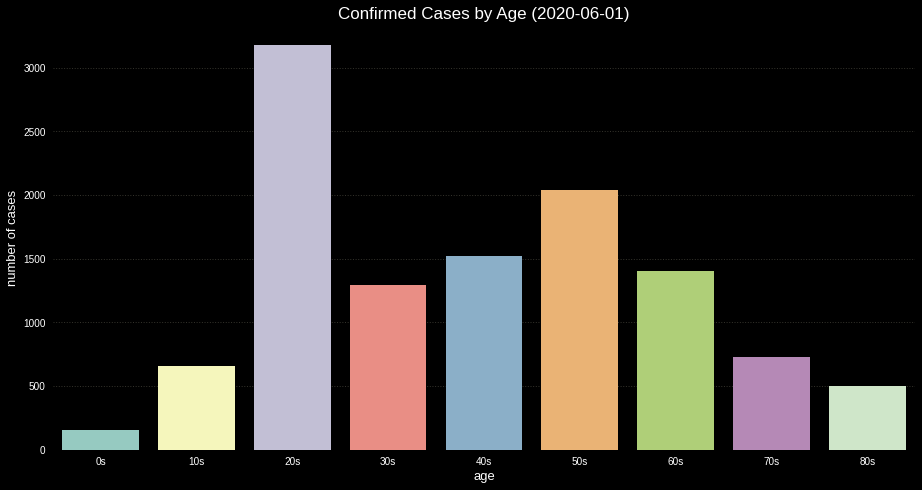

In [22]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title(f'Confirmed Cases by Age ({last_update})', fontsize=17)
sns.barplot(age_list, age_raw.confirmed[-9:])
ax.set_xlabel('age', size=13)
ax.set_ylabel('number of cases', size=13)
plt.show()

In [23]:
pop_order = pd.DataFrame()
pop_order['age'] = age_list
pop_order['population'] = (4055740, 4732100, 6971785, 7203550, 8291728, 8587047, 6472987, 3591533, 1874109)
pop_order['proportion'] = round(pop_order['population']/sum(pop_order['population']) * 100, 2)
pop_order = pop_order.sort_values('population', ascending=False)
pop_order.set_index(np.arange(1, 10), inplace=True)
display(pop_order)

age  population  proportion
1  50s     8587047       16.58
2  40s     8291728       16.01
3  30s     7203550       13.91
4  20s     6971785       13.46
5  60s     6472987       12.50
6  10s     4732100        9.14
7   0s     4055740        7.83
8  70s     3591533        6.94
9  80s     1874109        3.62

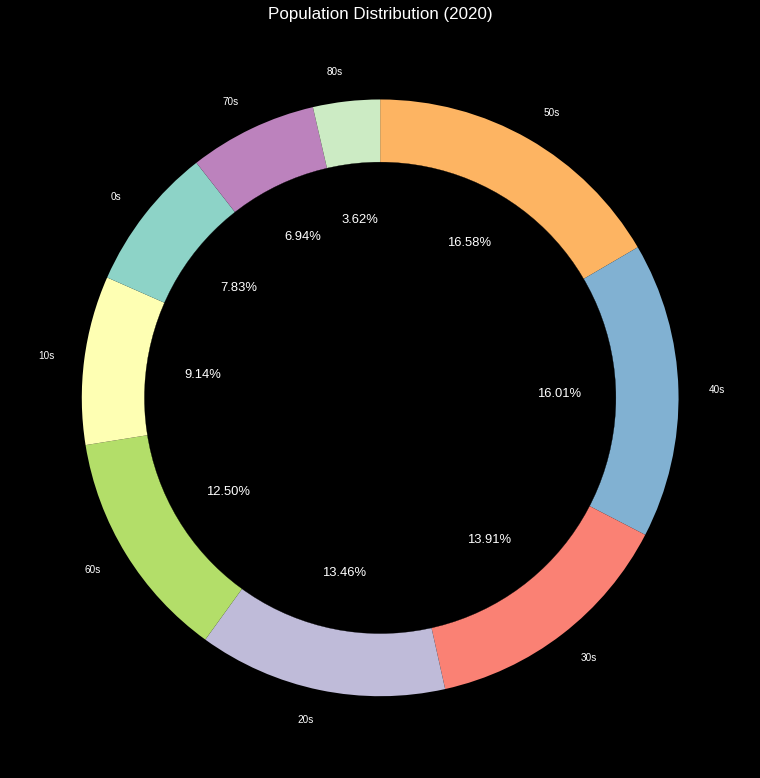

In [24]:
color_pie = [color_list[5], color_list[4], color_list[3]
             , color_list[2], color_list[6], color_list[1]
             , color_list[0], color_list[7], color_list[8]]
fig, ax = plt.subplots(figsize=(11, 11))
plt.title('Population Distribution (2020)', fontsize=17)
pop_circle = plt.Circle((0,0), 0.79, color='black')
plt.pie(pop_order.proportion
        , labels = pop_order.age
        , autopct = '%.2f%%'
        , colors = color_pie
        , startangle=90
        , counterclock=False)
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

In [25]:
## 1. Get a new table with population / proportion by age
confirmed_by_population = pop_order.sort_values('age')
confirmed_by_population['confirmed'] = list(age_raw[-9:].confirmed)

In [26]:
confirmed_by_population['confirmed_rate'] = confirmed_by_population['confirmed']/confirmed_by_population['population'] * 100;
display(confirmed_by_population)

age  population  proportion  confirmed  confirmed_rate
7   0s     4055740        7.83        157        0.003871
6  10s     4732100        9.14        655        0.013842
4  20s     6971785       13.46       3176        0.045555
3  30s     7203550       13.91       1292        0.017936
2  40s     8291728       16.01       1521        0.018344
1  50s     8587047       16.58       2039        0.023745
5  60s     6472987       12.50       1405        0.021706
8  70s     3591533        6.94        725        0.020186
9  80s     1874109        3.62        498        0.026573

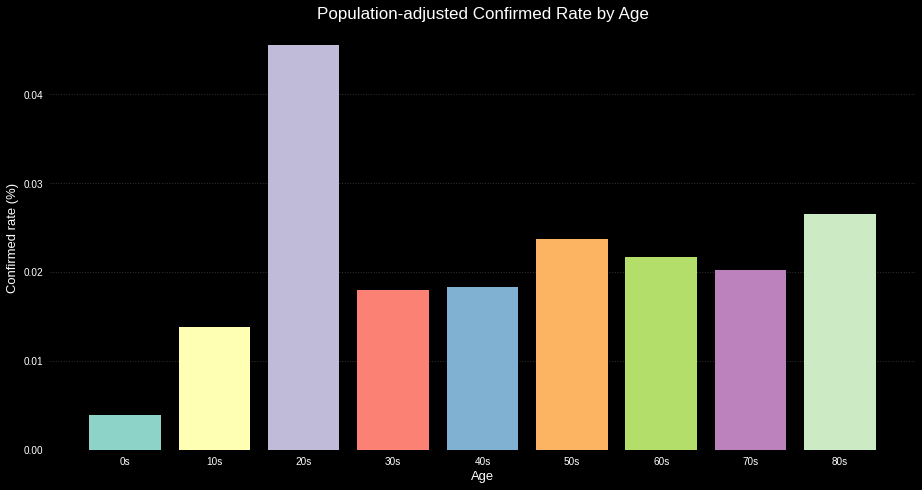

In [27]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Population-adjusted Confirmed Rate by Age', fontsize=17)
ax.bar(age_list, confirmed_by_population.confirmed_rate[-9:], color=color_list)
ax.set_xlabel('Age', size=13)
ax.set_ylabel('Confirmed rate (%)', size=13)
plt.show()

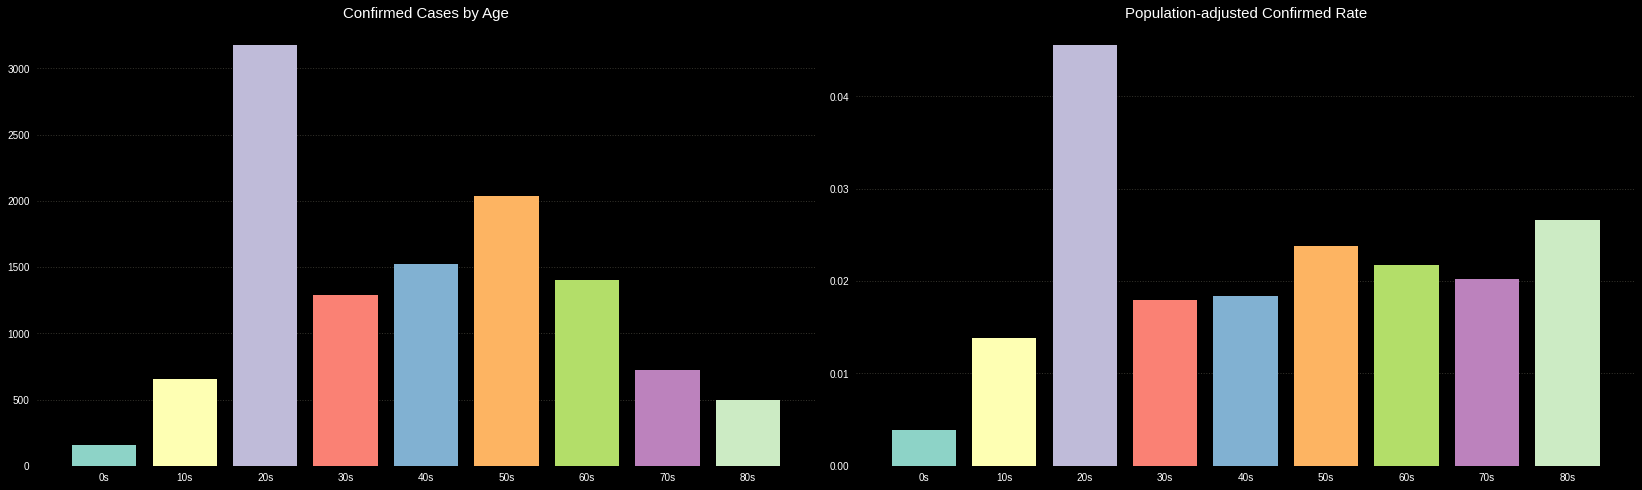

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(23, 7))

## 1. Absolute numbers
axes[0].set_title('Confirmed Cases by Age', fontsize=15)
axes[0].bar(age_list, confirmed_by_population.confirmed, color=color_list)

## 2. Confirmed rate
axes[1].set_title('Population-adjusted Confirmed Rate', fontsize=15)
axes[1].bar(age_list, confirmed_by_population.confirmed_rate, color=color_list)

plt.show()

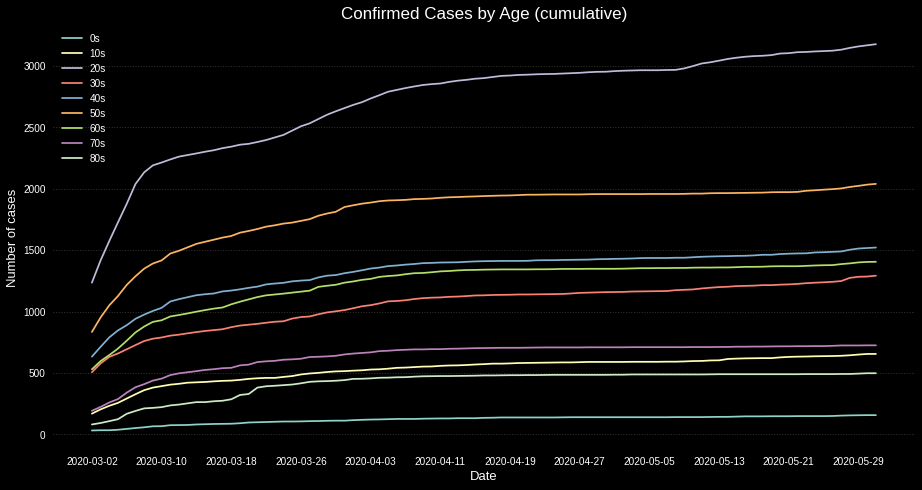

In [29]:
## Plot time series of confirmed cases
plot_groupby(age_raw, 'age', 'confirmed', 'Confirmed Cases by Age (cumulative)')

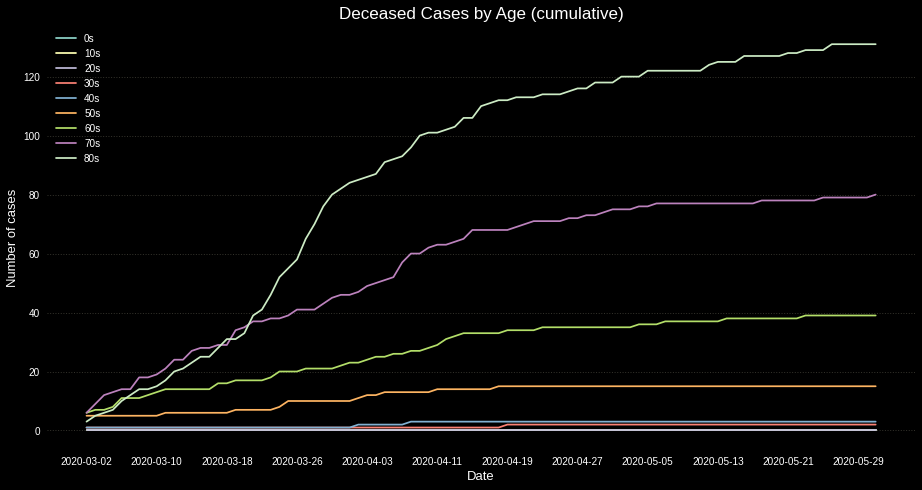

[Latest deceased cases]


0    1    2    3    4    5    6    7    8
age       0s  10s  20s  30s  40s  50s  60s  70s  80s
deceased   0    0    0    2    3   15   39   80  131

In [30]:
plot_groupby(age_raw, 'age', 'deceased', 'Deceased Cases by Age (cumulative)')

age_deceased = age_raw.tail(9)[['age', 'deceased']]
age_deceased.set_index(np.arange(0, len(age_raw.age.unique())), inplace=True)
print('[Latest deceased cases]')
display(age_deceased.T)

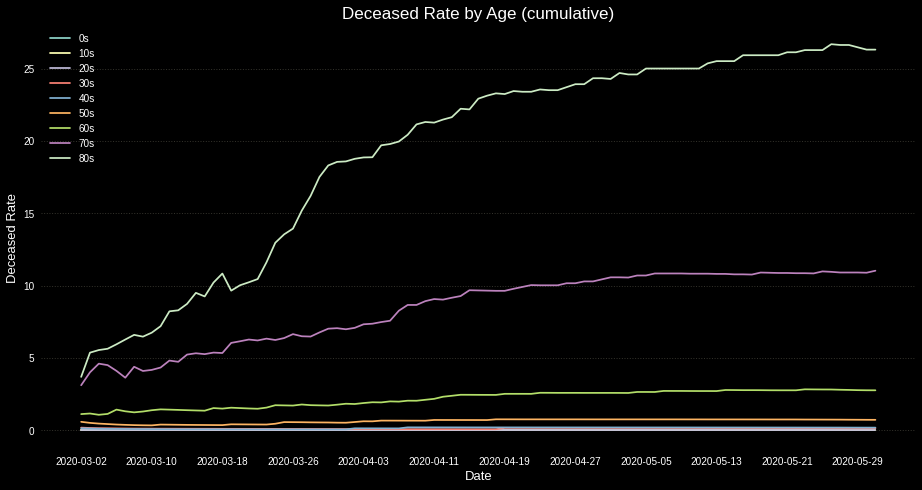

In [31]:
age_raw['deceased_rate'] = age_raw.deceased/age_raw.confirmed * 100.0

plot_groupby(age_raw, 'age', 'deceased_rate', 'Deceased Rate by Age (cumulative)', 'Deceased Rate')

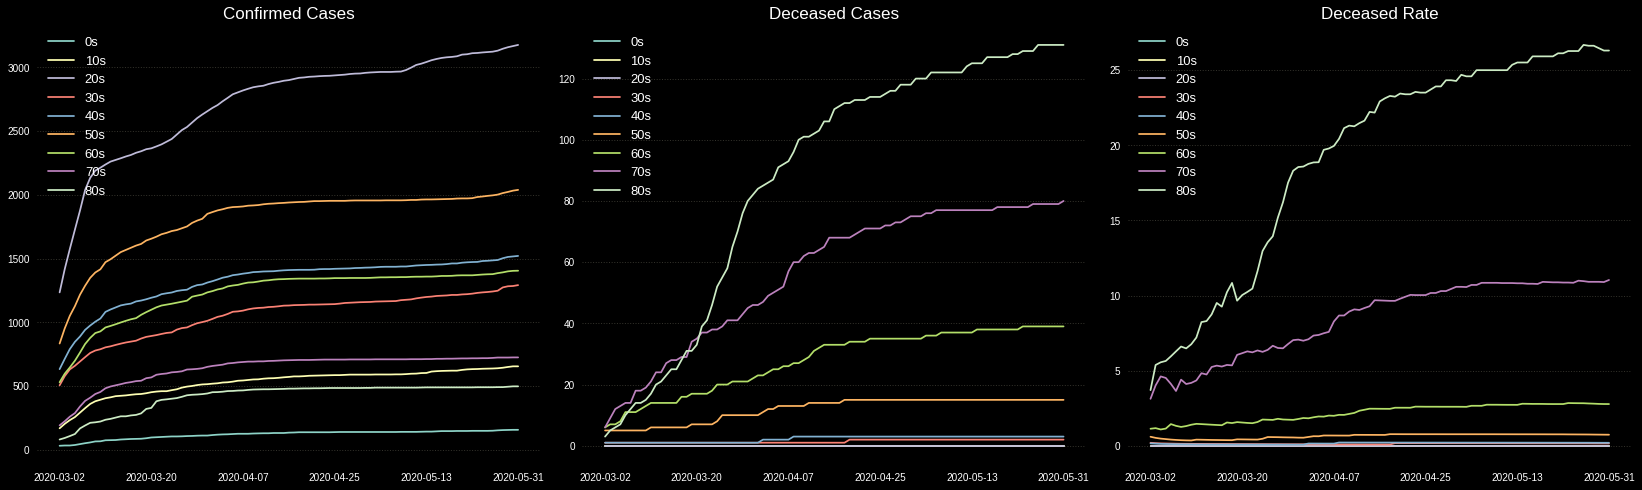

In [32]:
if not fast:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(23, 7))
    sub_list = [age_raw.confirmed, age_raw.deceased, age_raw.deceased_rate]
    title_list = ['Confirmed Cases', 'Deceased Cases', 'Deceased Rate']
    for sub, i, title in zip(sub_list, range(len(sub_list)), title_list):
        confirmed_set = sub.groupby(age_raw.age)
        for confirmed_each, age_each in zip(confirmed_set, age_list):
            axes[i].plot(age_raw.date.unique(), confirmed_each[1], label=age_each)
            axes[i].set_title(title, size=17)
        axes[i].set_xticks(axes[i].get_xticks()[::int(len(age_raw.date.unique())/5)])
        axes[i].legend(fontsize=13)

In [33]:
region_raw = get_data(file_paths[1])
data_range(region_raw, 'date')

[Sample data]


date  time          province  confirmed  released  deceased
0     2020-01-20    16             Seoul          0         0         0
1     2020-01-20    16             Busan          0         0         0
2     2020-01-20    16             Daegu          0         0         0
2258  2020-05-31     0  Gyeongsangbuk-do       1379      1295        54
2259  2020-05-31     0  Gyeongsangnam-do        123       121         0
2260  2020-05-31     0           Jeju-do         15        13         0

Date range: 133 days
# 2020-01-20 to 2020-05-31


In [34]:
print('Number of regions:', len(region_raw.province.unique()))
print('Number of logs per region:', len(region_raw[region_raw.province=='Jeju-do']))
print('regions * logs:', len(region_raw.province.unique()) * len(region_raw[region_raw.province=='Jeju-do']))
print('Number of rows:', len(region_raw))

Number of regions: 17
Number of logs per region: 133
regions * logs: 2261
Number of rows: 2261


In [35]:
region_raw.describe().iloc[1:, 1:]


confirmed     released    deceased
mean   391.320212   255.985847    7.641751
std   1291.888948   993.309392   28.890377
min      0.000000     0.000000    0.000000
25%      3.000000     0.000000    0.000000
50%     30.000000    12.000000    0.000000
75%    117.000000    56.000000    1.000000
max   6883.000000  6607.000000  185.000000

In [36]:
loc_latest = region_raw[region_raw.date==region_raw.date.iloc[-1]]
del loc_latest['date']
del loc_latest['time']
loc_latest = loc_latest.iloc[:, :2]
loc_latest['proportion'] = round(loc_latest.confirmed / sum(loc_latest.confirmed) * 100, 2)
loc_latest = loc_latest.sort_values('proportion', ascending=False)
loc_latest.set_index(np.arange(1, len(loc_latest)+1), inplace=True)
loc_latest_all = loc_latest.copy()
loc_latest_all

province  confirmed  proportion
1               Daegu       6883       62.95
2    Gyeongsangbuk-do       1379       12.61
3               Seoul        861        7.87
4         Gyeonggi-do        840        7.68
5             Incheon        206        1.88
6               Busan        147        1.34
7   Chungcheongnam-do        146        1.34
8    Gyeongsangnam-do        123        1.12
9   Chungcheongbuk-do         60        0.55
10         Gangwon-do         57        0.52
11              Ulsan         52        0.48
12             Sejong         47        0.43
13            Daejeon         46        0.42
14            Gwangju         32        0.29
15       Jeollabuk-do         21        0.19
16       Jeollanam-do         19        0.17
17            Jeju-do         15        0.14

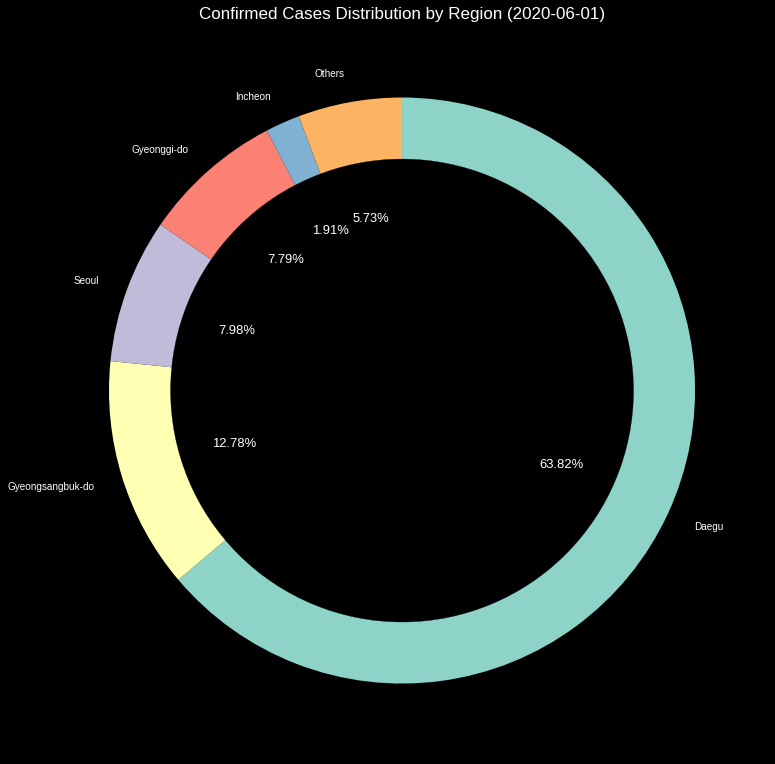

In [37]:
loc_latest.loc['18',:] = loc_latest.iloc[6:, :].sum()
loc_latest.loc['18','province'] = 'Others'
loc_latest = loc_latest[loc_latest.proportion > loc_latest.iloc[5, 2]]
loc_latest

fig, ax = plt.subplots(figsize=(11, 11))
plt.title(f'Confirmed Cases Distribution by Region ({last_update})', fontsize=17)
pop_circle=plt.Circle((0,0), 0.79, color='black')
plt.pie(loc_latest.proportion
        , labels=loc_latest.province
        , autopct='%.2f%%'
        , startangle=90
        , counterclock=False
       )
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

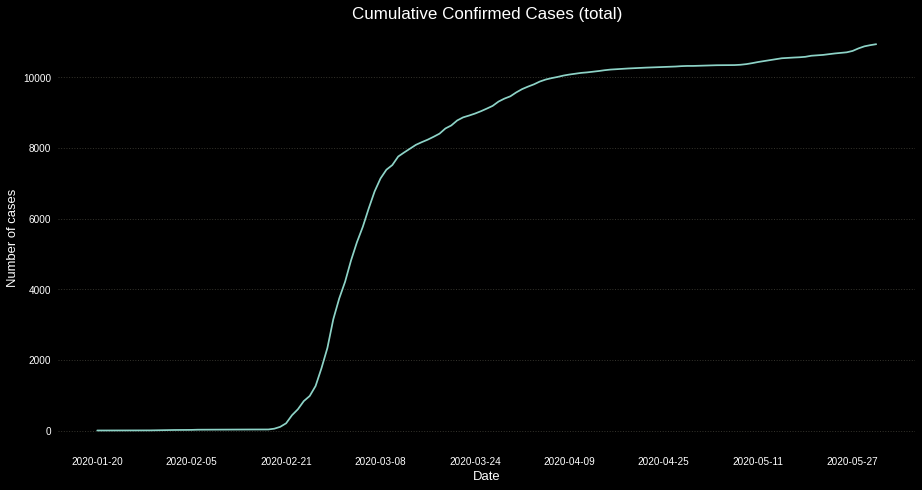

In [38]:
total_list = region_raw.groupby('date').sum().confirmed

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Confirmed Cases (total)', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(region_raw.date.unique()
         , region_raw.groupby('date').sum().confirmed)
ax.set_xticks(ax.get_xticks()[::int(len(region_raw.date.unique())/8)])
plt.show()

In [39]:
pd.DataFrame(total_list[total_list<=104].tail(3)).T

date       2020-02-18  2020-02-19  2020-02-20
confirmed          30          52         104

In [40]:
pd.DataFrame(total_list[total_list>=7900].head(3)).T

date       2020-03-13  2020-03-14  2020-03-15
confirmed        7979        8086        8162

[Confirmed Cases in each region (most to least)]


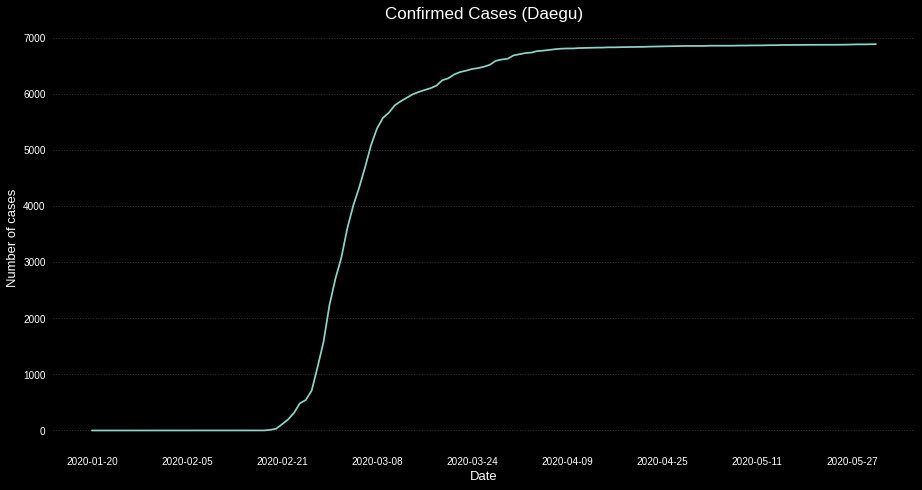

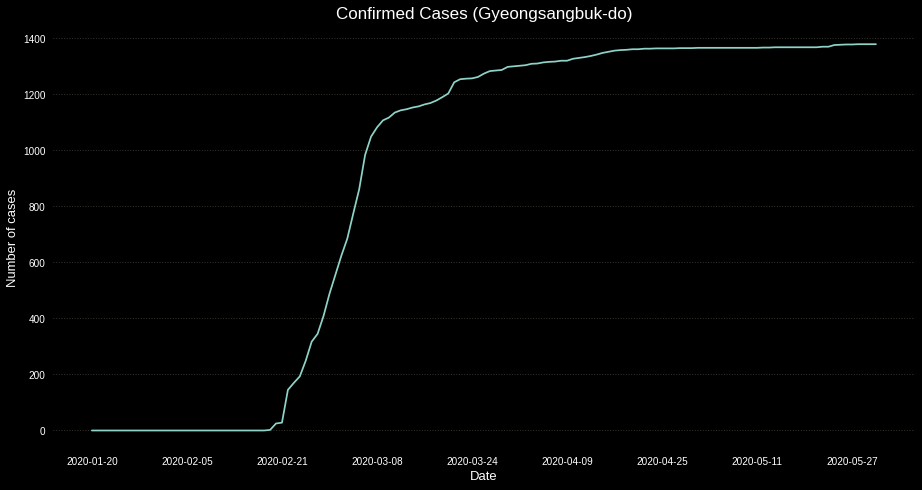

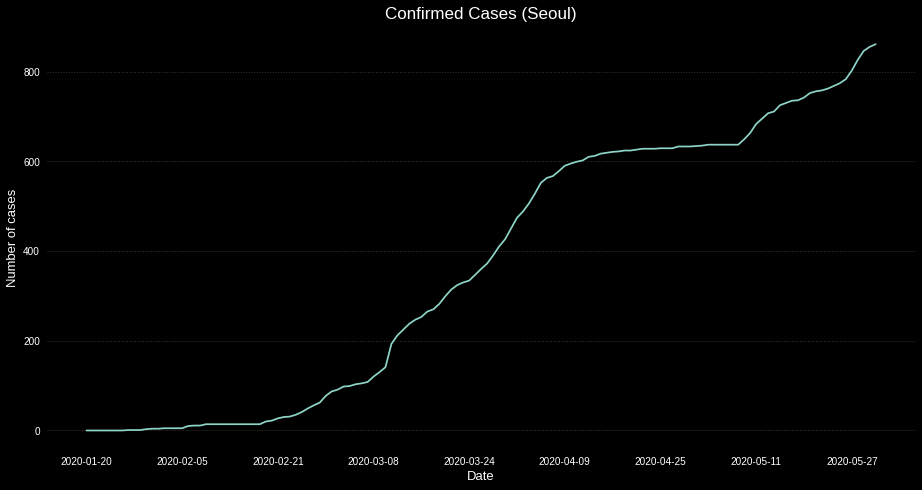

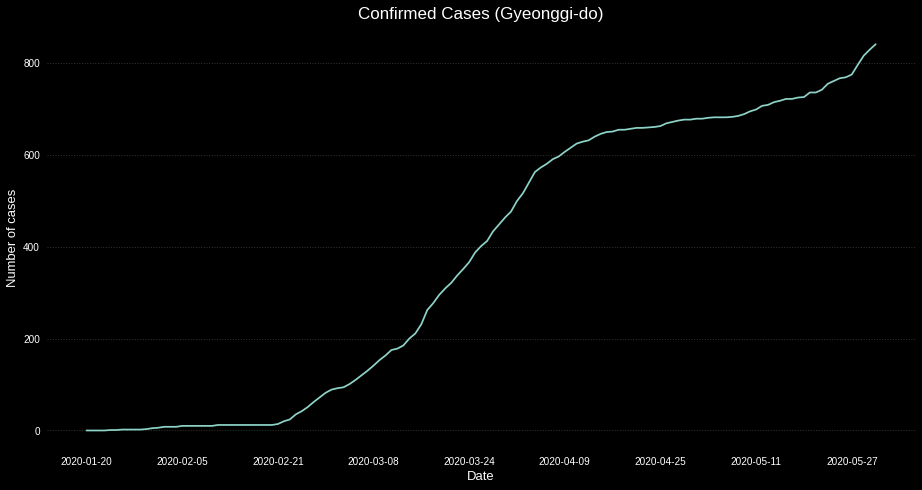

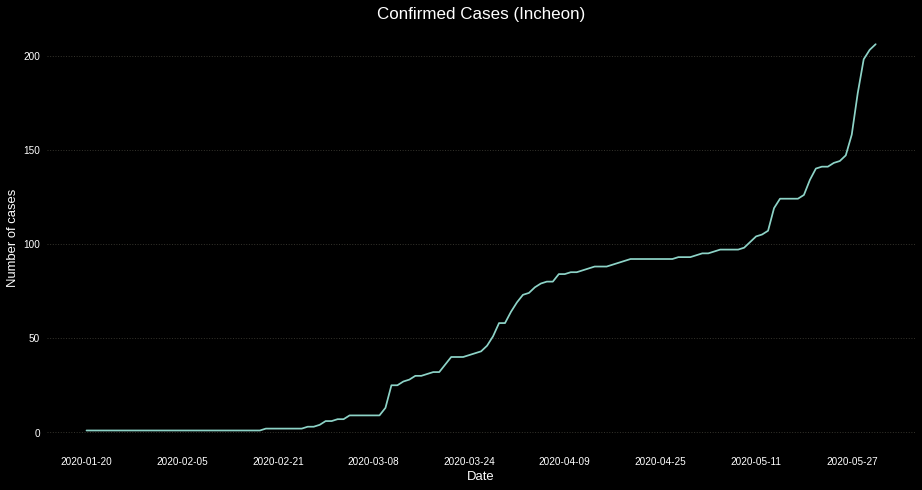

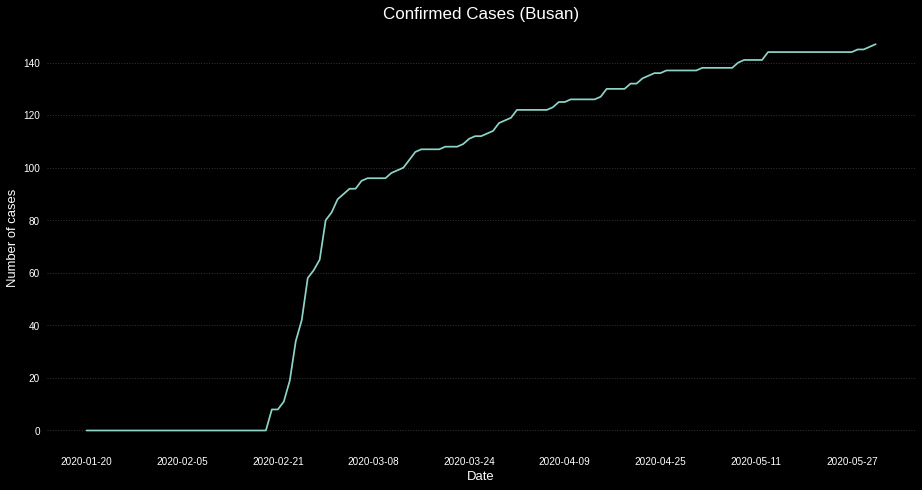

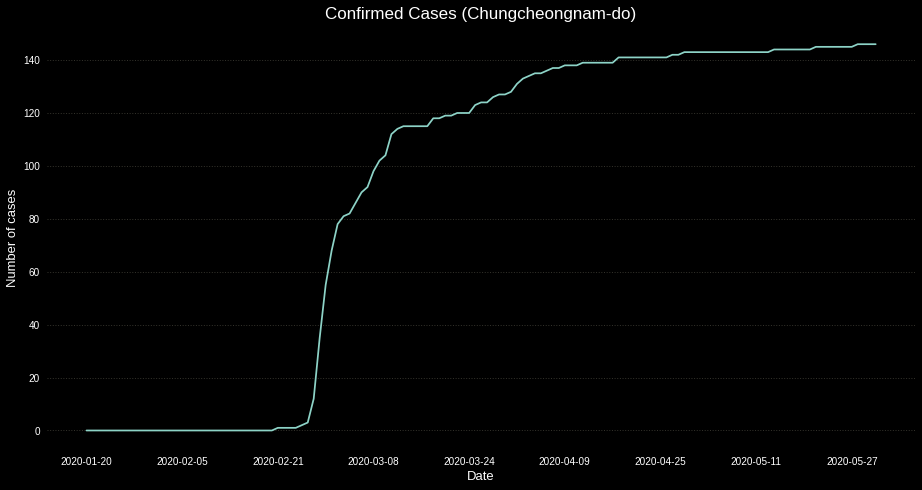

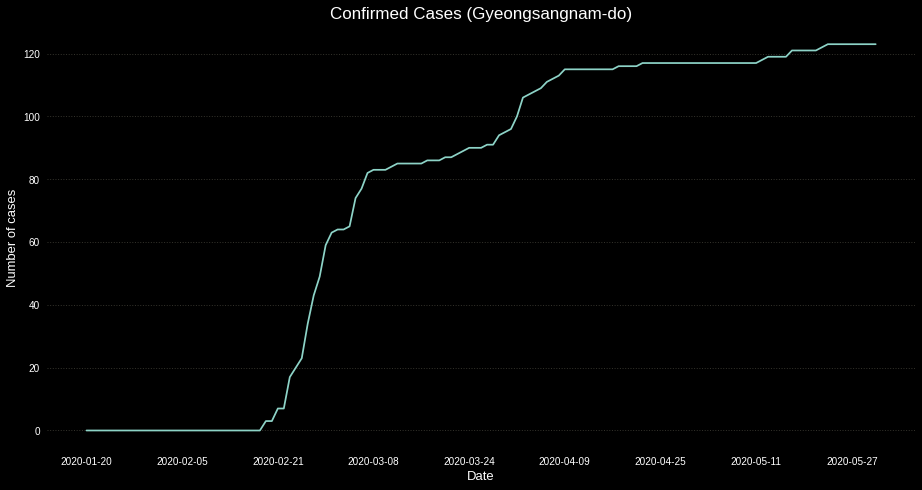

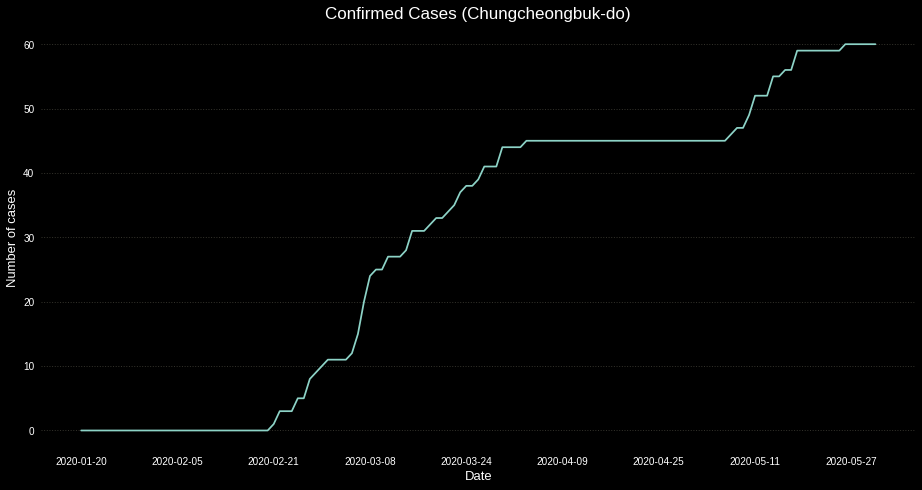

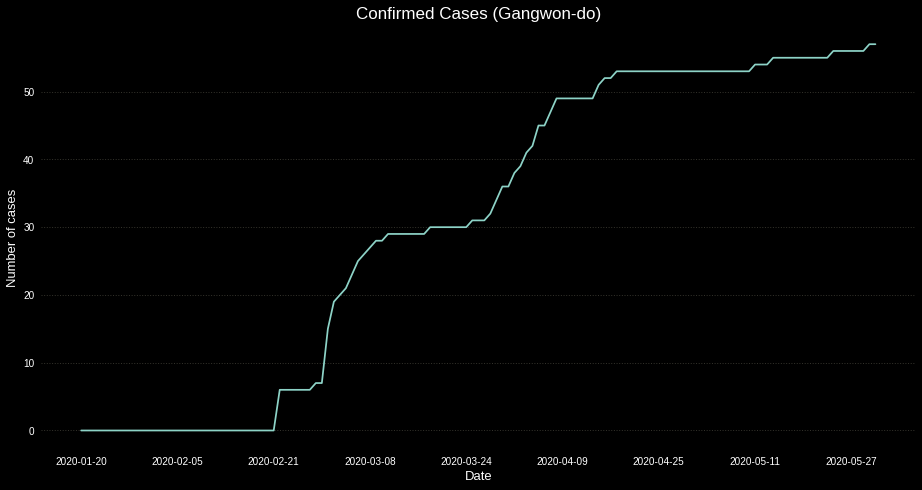

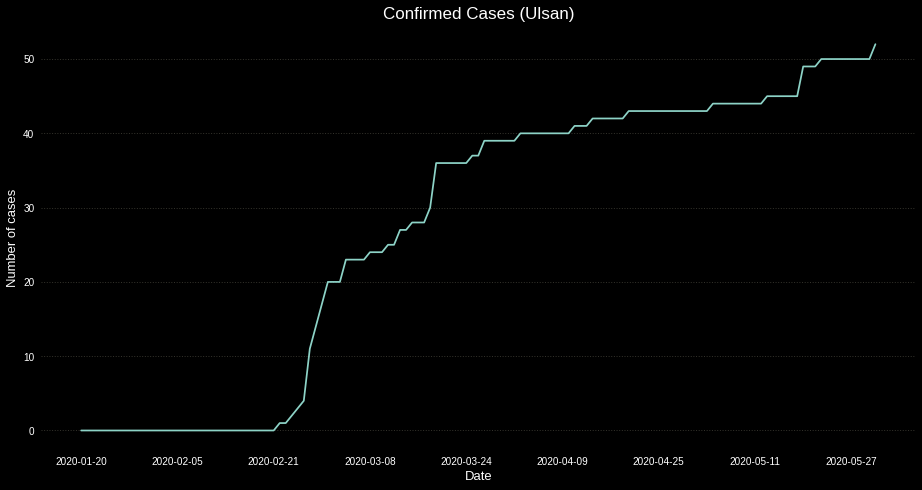

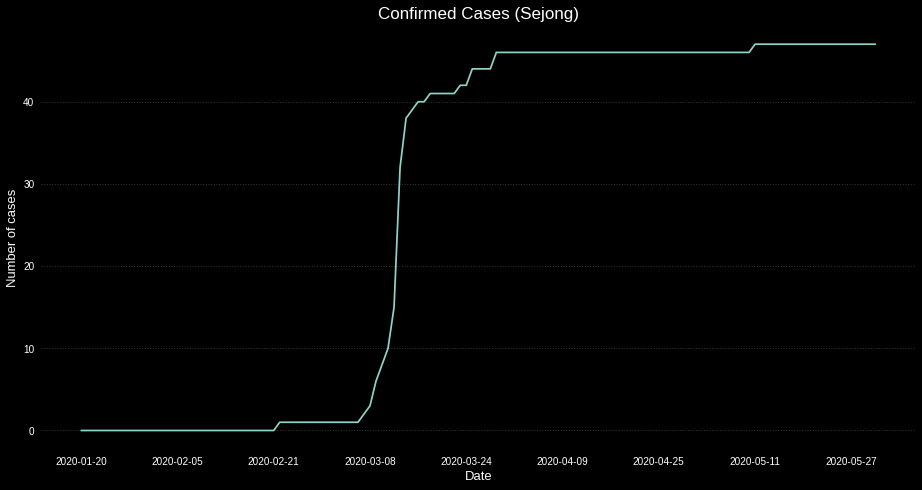

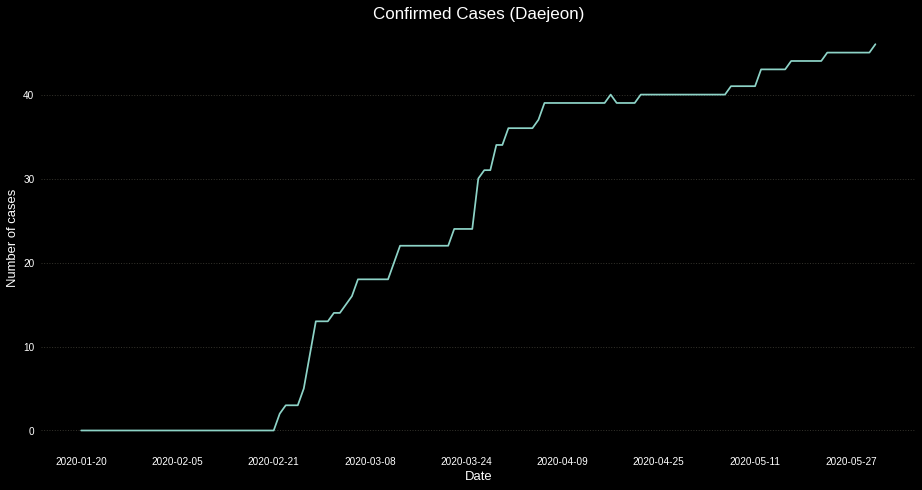

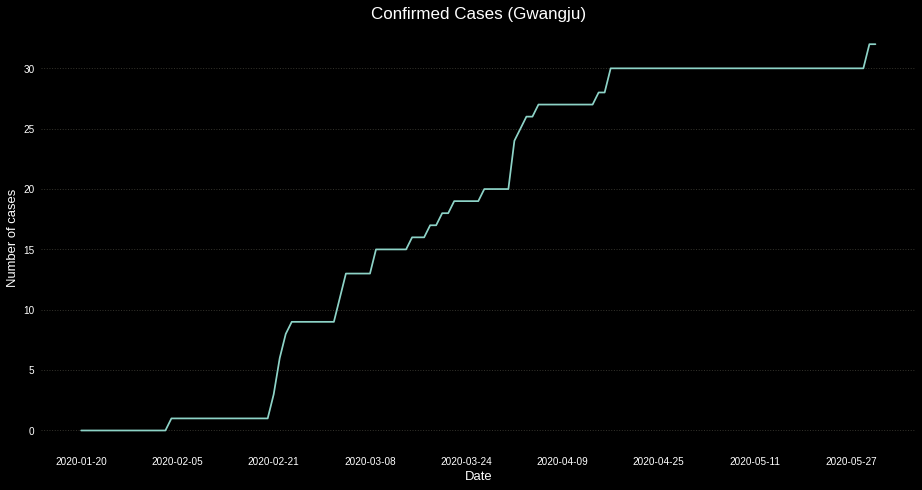

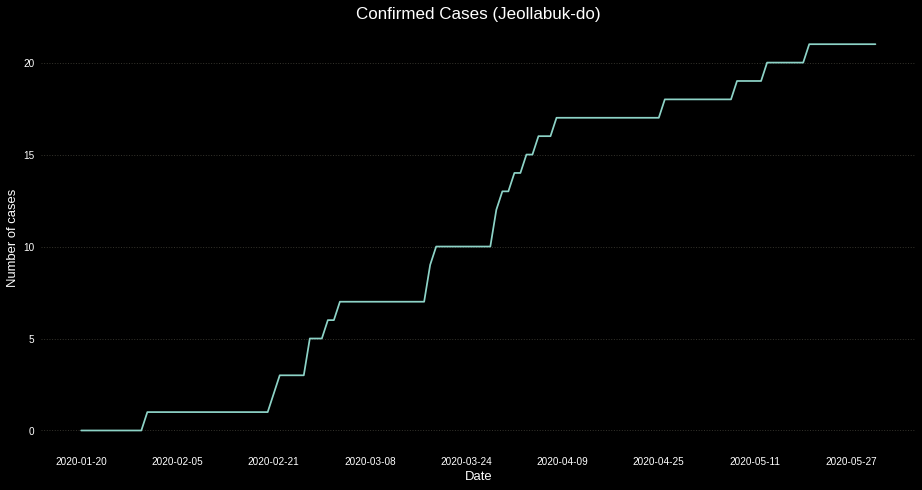

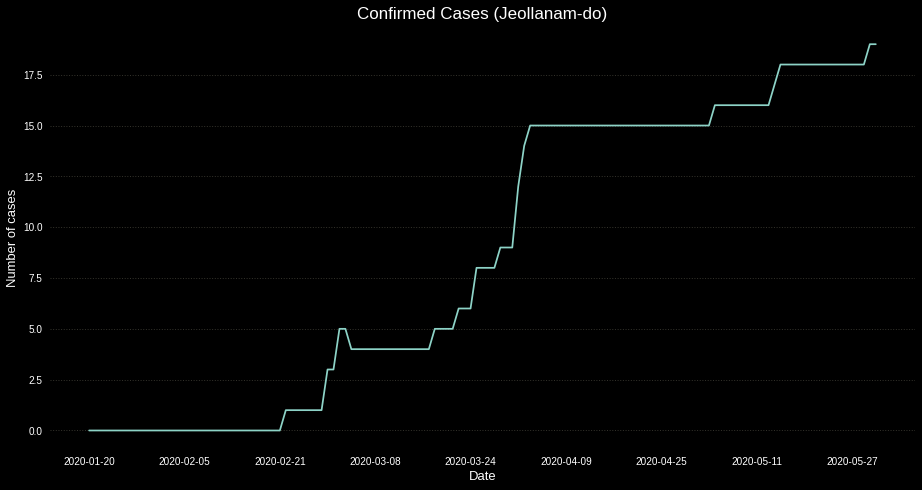

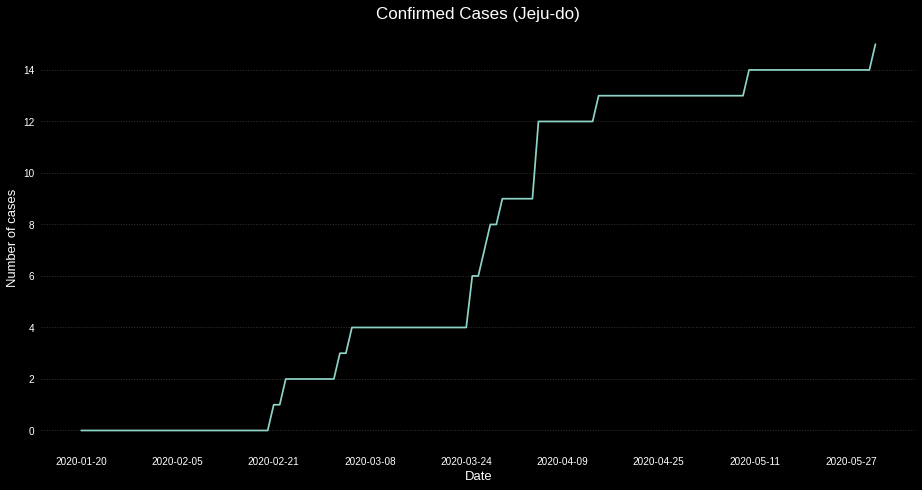

In [41]:
if not fast:
    print('[Confirmed Cases in each region (most to least)]')
    region_list = region_raw[region_raw.date==region_raw.date.iloc[-1]]\
                            .sort_values('confirmed', ascending = False)\
                            .province

    for region_name in region_list:
        fig, ax = plt.subplots(figsize=(13, 7))
        plt.title(f'Confirmed Cases ({region_name})', fontsize=17)
        ax.set_xlabel('Date', size=13)
        ax.set_ylabel('Number of cases', size=13)
        region_each = region_raw[region_raw.province==region_name]
        plt.plot(region_each.date.unique(), region_each.confirmed)
        ax.set_xticks(ax.get_xticks()[::int(len(region_each.date.unique())/8)])
        plt.show()


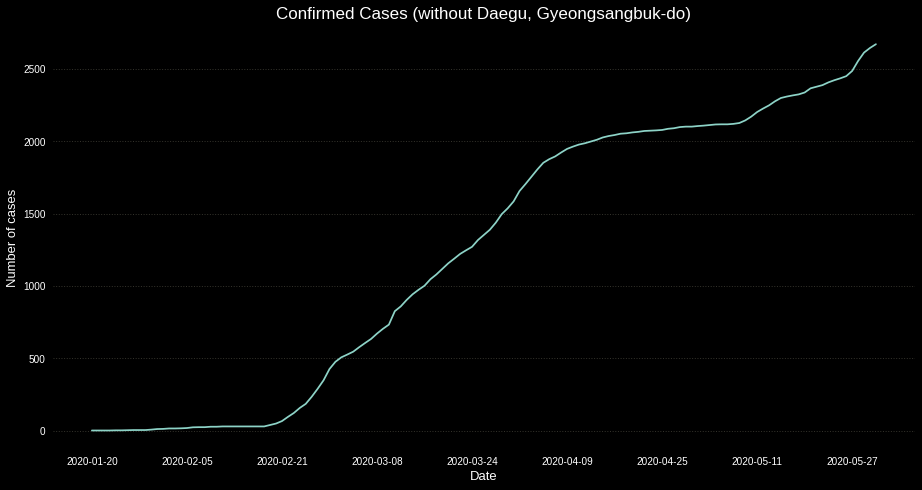

In [42]:
wo_outliers = region_raw[(region_raw.province!='Daegu') 
                           & (region_raw.province!='Gyeongsangbuk-do')
                          ].groupby('date').sum().confirmed

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Confirmed Cases (without Daegu, Gyeongsangbuk-do)', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(region_raw.date.unique(), wo_outliers)
ax.set_xticks(ax.get_xticks()[::int(len(region_raw.date.unique())/8)])
plt.show()

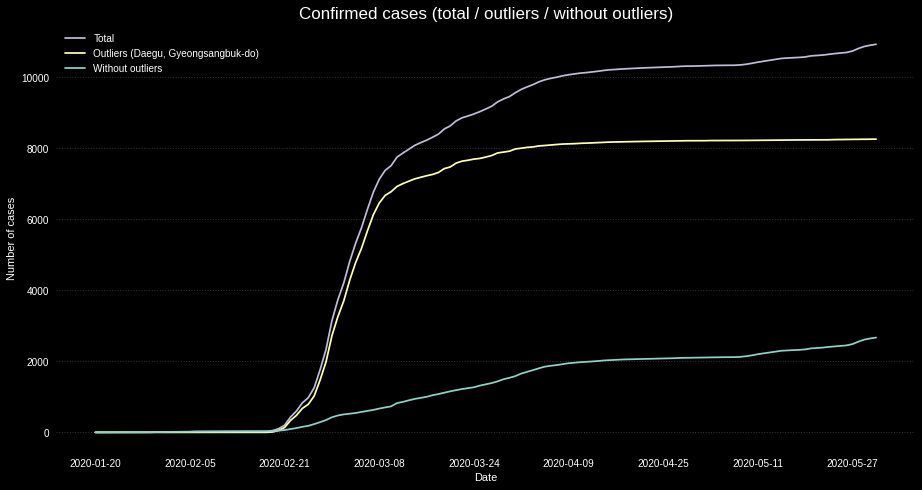

In [43]:
outliers = region_raw[(region_raw.province=='Daegu')\
                        | (region_raw.province=='Gyeongsangbuk-do')
                       ].groupby('date').sum().confirmed
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Confirmed cases (total / outliers / without outliers)', fontsize=17)
plt.plot(region_raw.date.unique(), total_list, color=color_list[2])
plt.plot(region_raw.date.unique(), outliers, color=color_list[1])
plt.plot(region_raw.date.unique(), wo_outliers, color=color_list[0])
ax.set_xticks(ax.get_xticks()[::int(len(region_raw.date.unique())/8)])
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend(['Total', 'Outliers (Daegu, Gyeongsangbuk-do)', 'Without outliers'])

plt.show()

In [44]:
loc_meta_raw = pd.read_csv(file_paths[2])
print('[Sample data]')
loc_meta_raw.tail(3).T

[Sample data]


241      242      243
code                                 61180    70000    80000
province                  Gyeongsangnam-do  Jeju-do    Korea
city                          Hapcheon-gun  Jeju-do    Korea
latitude                           35.5667  33.4889   37.567
longitude                          128.166    126.5  126.978
elementary_school_count                 17      113     6087
kindergarten_count                      15      123     8837
university_count                         0        4      340
academy_ratio                         0.71     1.53     1.56
elderly_population_ratio             38.44     15.1    15.67
elderly_alone_ratio                   24.7      6.4      7.2
nursing_home_count                      96     1245    94865

In [45]:


print('Number of unique regions:', len(loc_meta_raw.province.unique()))
print(loc_meta_raw.province.unique())



Number of unique regions: 18
['Seoul' 'Busan' 'Daegu' 'Gwangju' 'Incheon' 'Daejeon' 'Ulsan' 'Sejong'
 'Gyeonggi-do' 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do'
 'Jeollabuk-do' 'Jeollanam-do' 'Gyeongsangbuk-do' 'Gyeongsangnam-do'
 'Jeju-do' 'Korea']


In [46]:


loc_meta_raw[loc_meta_raw.province=='Korea'].T



243
code                        80000
province                    Korea
city                        Korea
latitude                   37.567
longitude                 126.978
elementary_school_count      6087
kindergarten_count           8837
university_count              340
academy_ratio                1.56
elderly_population_ratio    15.67
elderly_alone_ratio           7.2
nursing_home_count          94865

In [47]:
elderly_pop_df = pd.DataFrame(loc_meta_raw[loc_meta_raw.province!='Korea']
                          .groupby('province').mean()
                          .elderly_population_ratio
                          .sort_values(ascending=False)
                         )
elderly_pop_df

elderly_population_ratio
province                                   
Jeollanam-do                      28.142174
Gyeongsangbuk-do                  27.556250
Jeollabuk-do                      27.470667
Gyeongsangnam-do                  24.749474
Chungcheongnam-do                 23.844375
Chungcheongbuk-do                 23.192500
Gangwon-do                        22.890526
Busan                             19.357647
Daegu                             17.031111
Incheon                           16.399091
Seoul                             15.738077
Jeju-do                           15.100000
Gwangju                           14.815000
Gyeonggi-do                       14.429688
Daejeon                           14.376667
Ulsan                             11.773333
Sejong                             9.480000

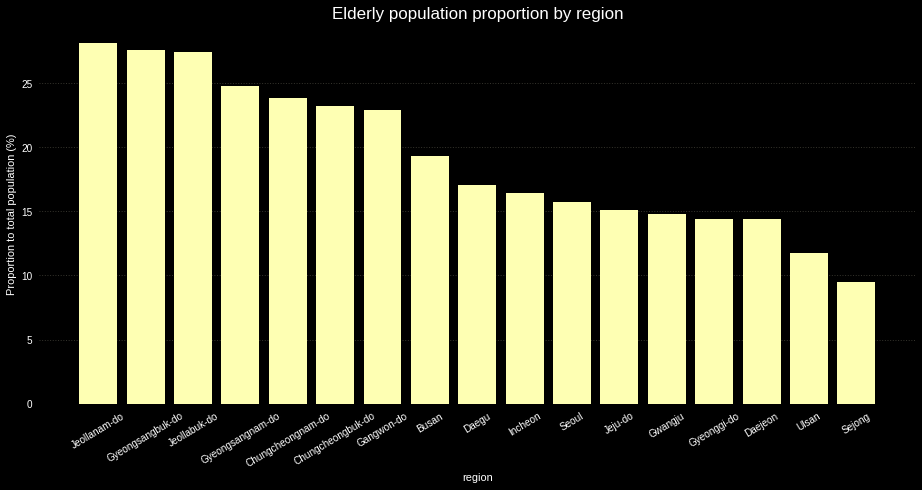

In [48]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Elderly population proportion by region', fontsize=17)
plt.xticks(rotation=31)
plt.bar(elderly_pop_df.index, elderly_pop_df.elderly_population_ratio, color=color_list[1])
plt.xlabel('region')
plt.ylabel('Proportion to total population (%)')
plt.show()

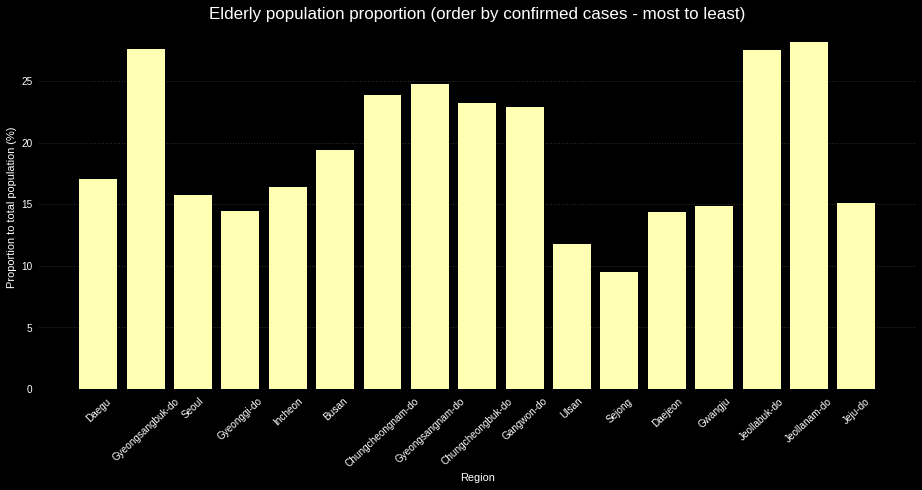

In [49]:


elderly_pop_ordered = elderly_pop_df.loc[loc_latest_all.province.values, :].elderly_population_ratio
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Elderly population proportion (order by confirmed cases - most to least)', fontsize=17)
plt.xticks(rotation=43)
plt.xlabel('Region')
plt.ylabel('Proportion to total population (%)')
plt.bar(elderly_pop_ordered.index, elderly_pop_ordered, color=color_list[1])
plt.show()



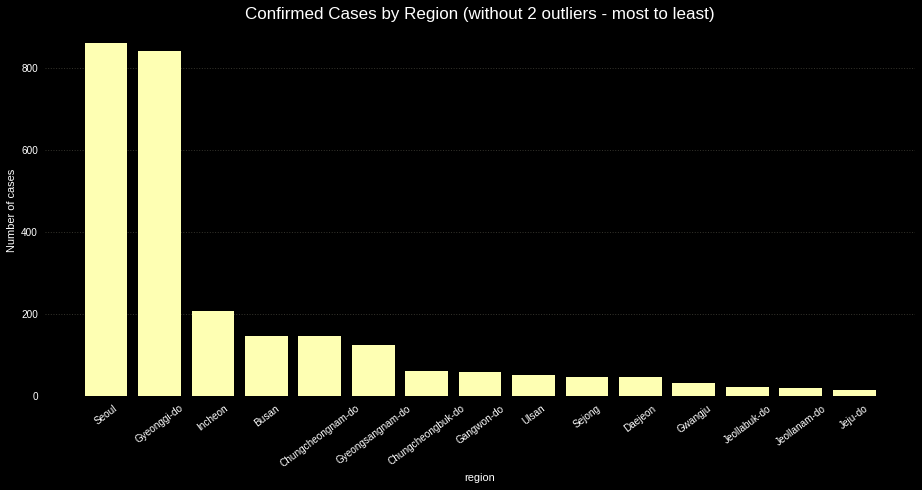

In [50]:


fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Confirmed Cases by Region (without 2 outliers - most to least)', fontsize=17)
plt.xticks(rotation=37)
plt.bar(loc_latest_all[2:].province
        , loc_latest_all[2:].confirmed
        , color=color_list[1])
plt.xlabel('region')
plt.ylabel('Number of cases')
plt.show()



In [51]:


pop_dense = pd.DataFrame()
pop_dense['region'] = loc_latest_all.province
pop_dense['population'] = np.divide(
    [2450, 2674, 13031, 9705, 2180, 3400
     , 3356, 304, 2939, 1154, 1619, 1521
     , 1518, 1493, 1820, 1790, 653]
    , 1000 # thousand to million
)

# density = number of people / km²
pop_dense['density'] = [2773, 141, 16034, 1279, 265, 4416
                        , 318, 653, 2764, 1088, 219, 90
                        , 2813, 2980, 226, 145, 353]
pop_dense



region  population  density
1               Daegu       2.450     2773
2    Gyeongsangbuk-do       2.674      141
3               Seoul      13.031    16034
4         Gyeonggi-do       9.705     1279
5             Incheon       2.180      265
6               Busan       3.400     4416
7   Chungcheongnam-do       3.356      318
8    Gyeongsangnam-do       0.304      653
9   Chungcheongbuk-do       2.939     2764
10         Gangwon-do       1.154     1088
11              Ulsan       1.619      219
12             Sejong       1.521       90
13            Daejeon       1.518     2813
14            Gwangju       1.493     2980
15       Jeollabuk-do       1.820      226
16       Jeollanam-do       1.790      145
17            Jeju-do       0.653      353

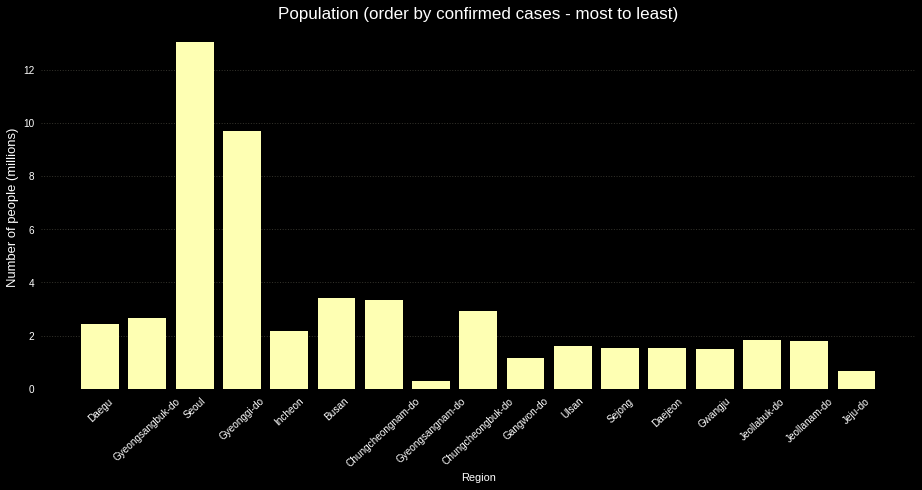

In [52]:


fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Population (order by confirmed cases - most to least)', fontsize=17)
plt.bar(pop_dense.region, pop_dense.population, color=color_list[1])
plt.xticks(rotation=43)
plt.xlabel('Region')
plt.ylabel('Number of people (millions)', size=13)
plt.show()



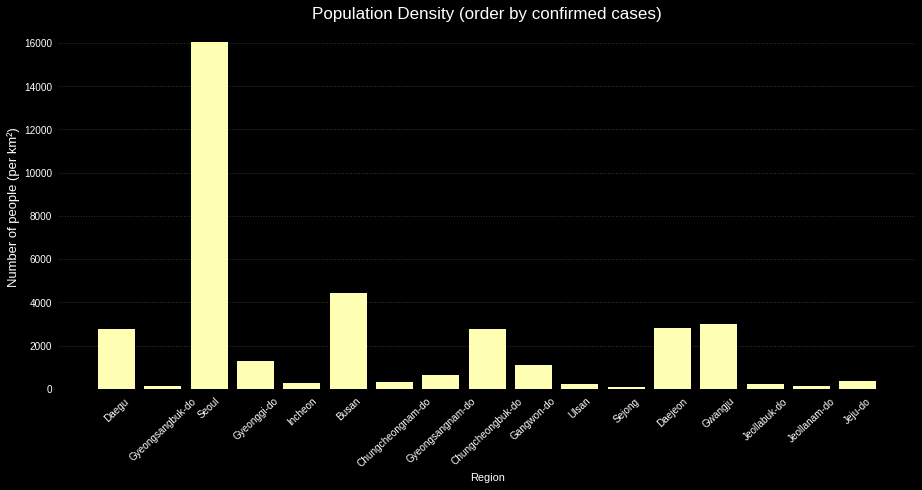

In [53]:


fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Population Density (order by confirmed cases)', fontsize=17)
plt.bar(pop_dense.region, pop_dense.density, color=color_list[1])
plt.ylabel('Number of people (per km²)', size=13)
plt.xlabel('Region')
plt.xticks(rotation=43)
plt.show()



In [54]:
sex_raw = get_data(file_paths[3])
data_range(sex_raw, 'date')

[Sample data]


date  time     sex  confirmed  deceased
0    2020-03-02     0    male       1591        13
1    2020-03-02     0  female       2621         9
2    2020-03-03     0    male       1810        16
179  2020-05-30     0  female       6661       127
180  2020-05-31     0    male       4795       143
181  2020-05-31     0  female       6673       127

Date range: 91 days
# 2020-03-02 to 2020-05-31


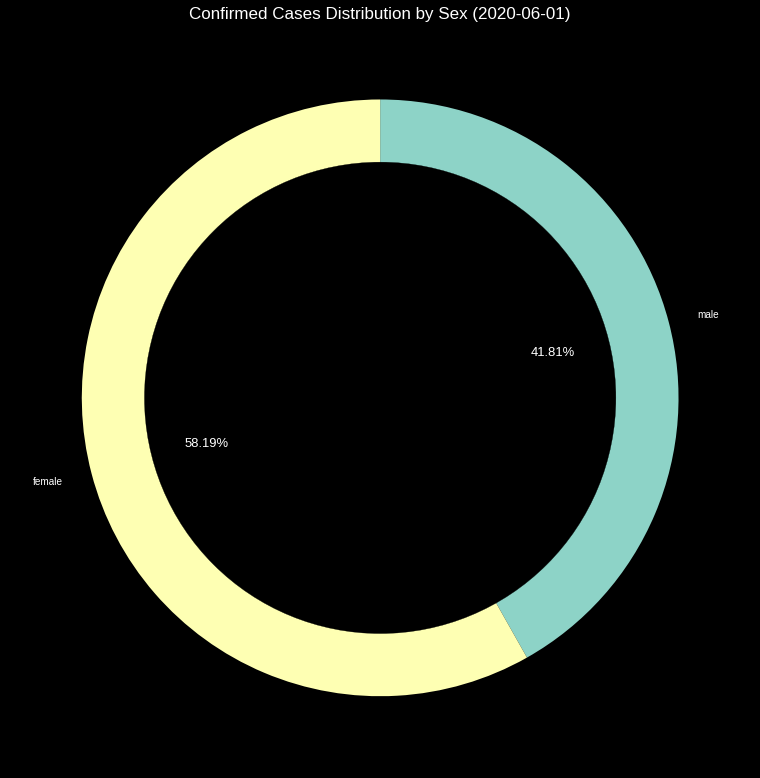

In [55]:
fig, ax = plt.subplots(figsize=(11, 11))
plt.title(f'Confirmed Cases Distribution by Sex ({last_update})', fontsize=17)
pop_circle=plt.Circle((0,0), 0.79, color='black')
plt.pie(sex_raw.confirmed[-2:]
        , labels=['male', 'female']
        , autopct='%.2f%%'
        , startangle=90
        , counterclock=False)
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

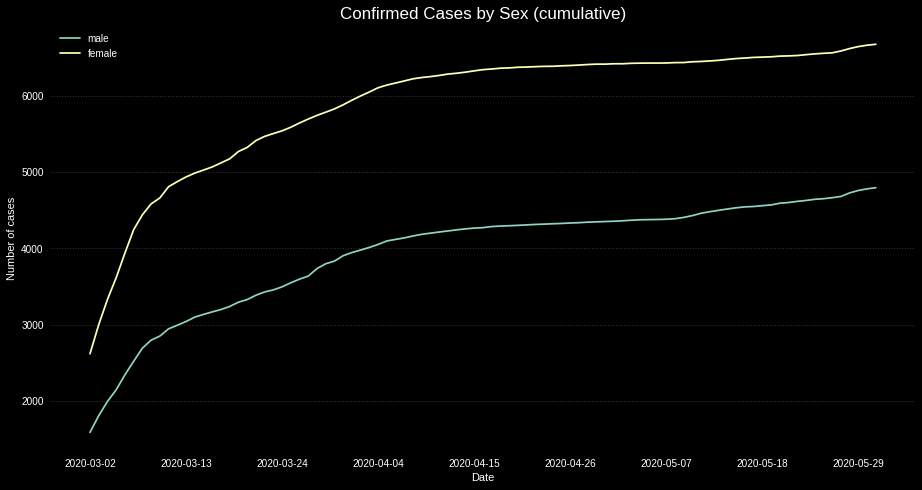

In [56]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Confirmed Cases by Sex (cumulative)', fontsize=17)
sex_confirmed = (sex_raw[sex_raw.sex=='male'].confirmed, sex_raw[sex_raw.sex=='female'].confirmed)
for sex_each, sex_label in zip(sex_confirmed, ['male', 'female']):
    plt.plot(sex_raw.date.unique(), sex_each, label=sex_label)
ax.set_xticks(ax.get_xticks()[::int(len(sex_raw.date.unique())/8)])
plt.xlabel('Date')
plt.ylabel('Number of cases')
ax.legend()
plt.show()

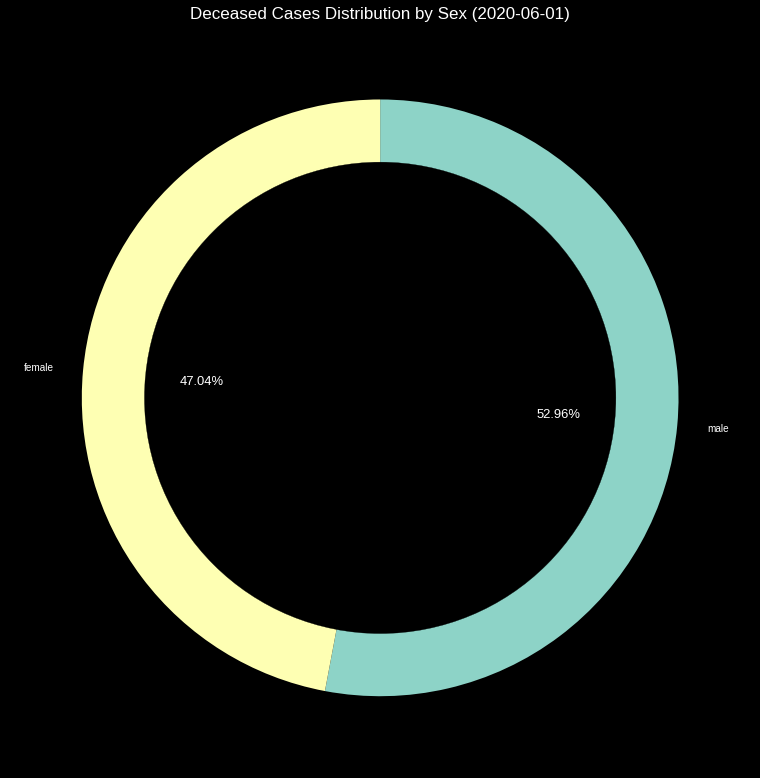

In [57]:
fig, ax = plt.subplots(figsize=(11, 11))
plt.title(f'Deceased Cases Distribution by Sex ({last_update})', fontsize=17)
pop_circle=plt.Circle((0,0), 0.79, color='black')
plt.pie(sex_raw.deceased[-2:]
        , labels=['male', 'female']
        , autopct='%.2f%%'
        , startangle=90
        , counterclock=False)
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

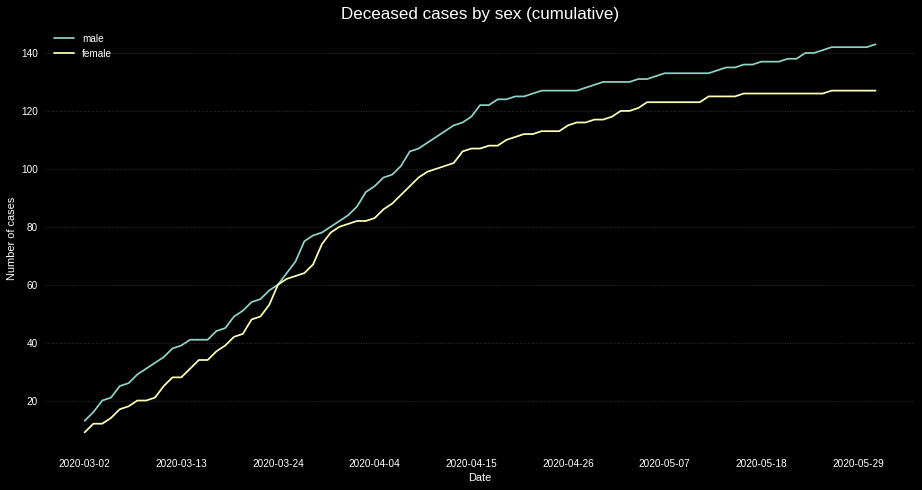

In [58]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Deceased cases by sex (cumulative)', fontsize=17)
sex_deceased = (sex_raw[sex_raw.sex=='male'].deceased, sex_raw[sex_raw.sex=='female'].deceased)

for sex_each, sex_label in zip(sex_deceased, ['male', 'female']):
    plt.plot(sex_raw.date.unique(), sex_each, label=sex_label)
ax.set_xticks(ax.get_xticks()[::int(len(sex_raw.date.unique())/8)])
plt.xlabel('Date')
plt.ylabel('Number of cases')
ax.legend()
plt.show()

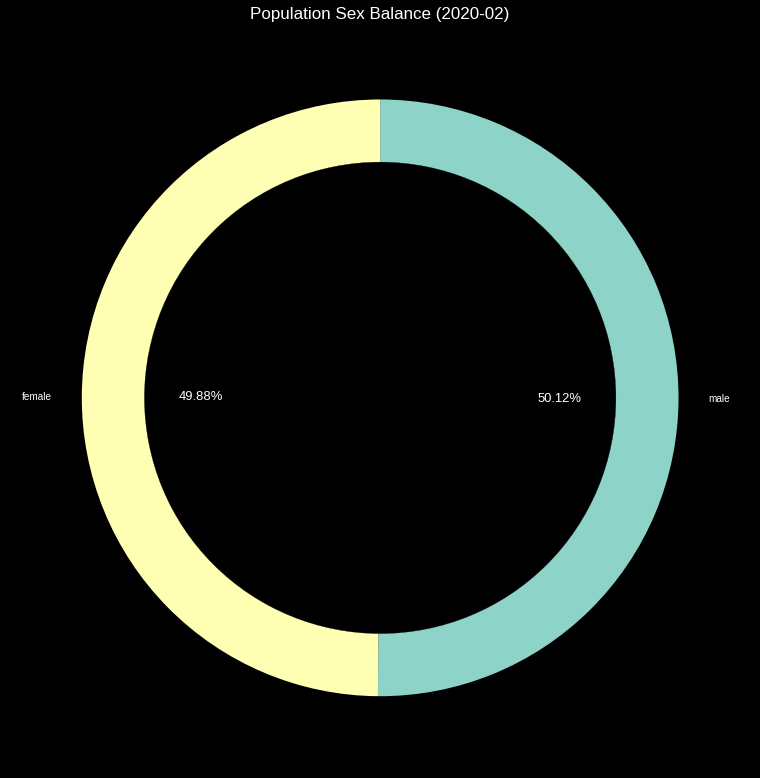

In [59]:
fig, ax = plt.subplots(figsize=(11, 11))
plt.title('Population Sex Balance (2020-02)', fontsize=17)
pop_circle=plt.Circle((0,0), 0.79, color='black')
plt.pie([25984136, 25860491]
        , labels=['male', 'female']
        , autopct='%.2f%%'
        , startangle=90
        , counterclock=False)
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()


In [60]:
pop_meta = pop_dense.copy()
pop_meta['sex_bal'] = [97.7, 101.4, 101.2, 95.1, 104.0, 96.3, 101.3, 99.4, 100.5
                          , 105.7, 102.7, 101.2, 99.8, 98.0, 98.9, 100.9, 101.1]
pop_meta

region  population  density  sex_bal
1               Daegu       2.450     2773     97.7
2    Gyeongsangbuk-do       2.674      141    101.4
3               Seoul      13.031    16034    101.2
4         Gyeonggi-do       9.705     1279     95.1
5             Incheon       2.180      265    104.0
6               Busan       3.400     4416     96.3
7   Chungcheongnam-do       3.356      318    101.3
8    Gyeongsangnam-do       0.304      653     99.4
9   Chungcheongbuk-do       2.939     2764    100.5
10         Gangwon-do       1.154     1088    105.7
11              Ulsan       1.619      219    102.7
12             Sejong       1.521       90    101.2
13            Daejeon       1.518     2813     99.8
14            Gwangju       1.493     2980     98.0
15       Jeollabuk-do       1.820      226     98.9
16       Jeollanam-do       1.790      145    100.9
17            Jeju-do       0.653      353    101.1

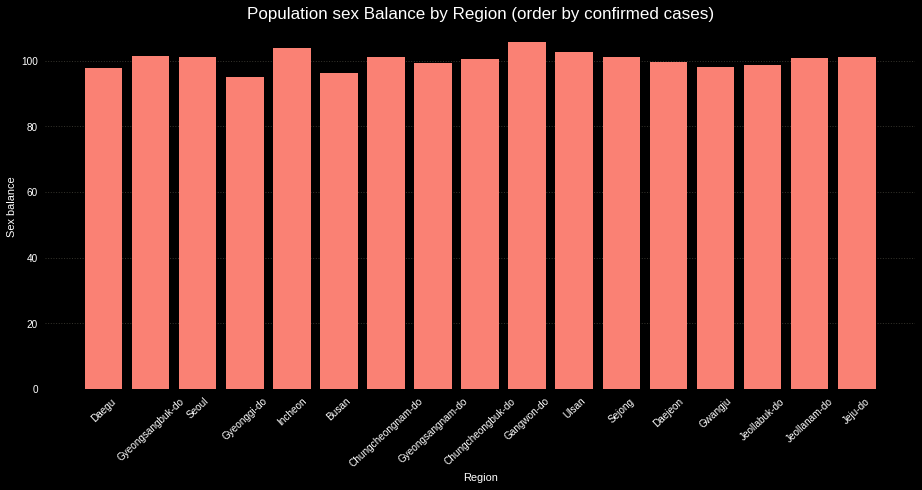

In [61]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Population sex Balance by Region (order by confirmed cases)', fontsize=17)
plt.xticks(rotation=43)
plt.bar(pop_meta.region, pop_meta.sex_bal, color=color_list[3])
plt.xlabel('Region')
plt.ylabel('Sex balance')
plt.show()

In [62]:
test_raw = get_data(file_paths[4])
data_range(test_raw, 'date')

[Sample data]


date  time    test  negative  confirmed  released  deceased
0    2020-01-20    16       1         0          1         0         0
1    2020-01-21    16       1         0          1         0         0
2    2020-01-22    16       4         3          1         0         0
130  2020-05-29     0  885120    849161      11402     10363       269
131  2020-05-30     0  902901    865162      11441     10398       269
132  2020-05-31     0  910822    876060      11468     10405       270

Date range: 133 days
# 2020-01-20 to 2020-05-31


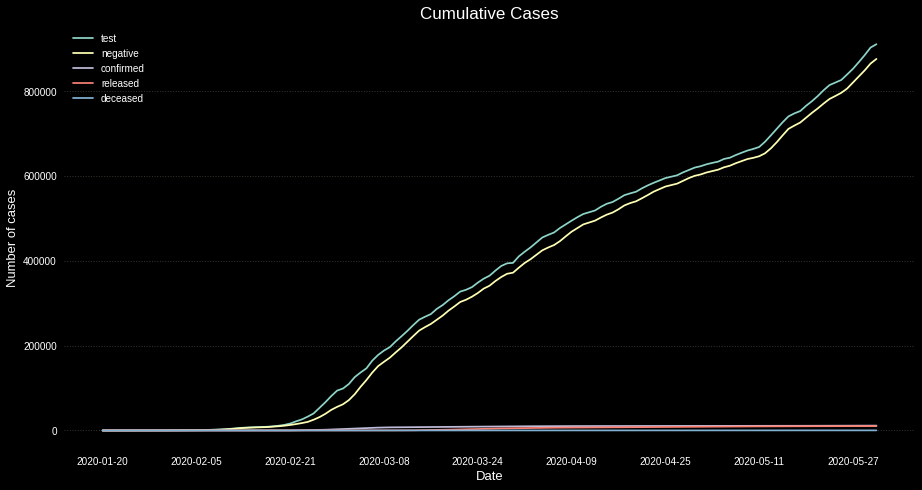

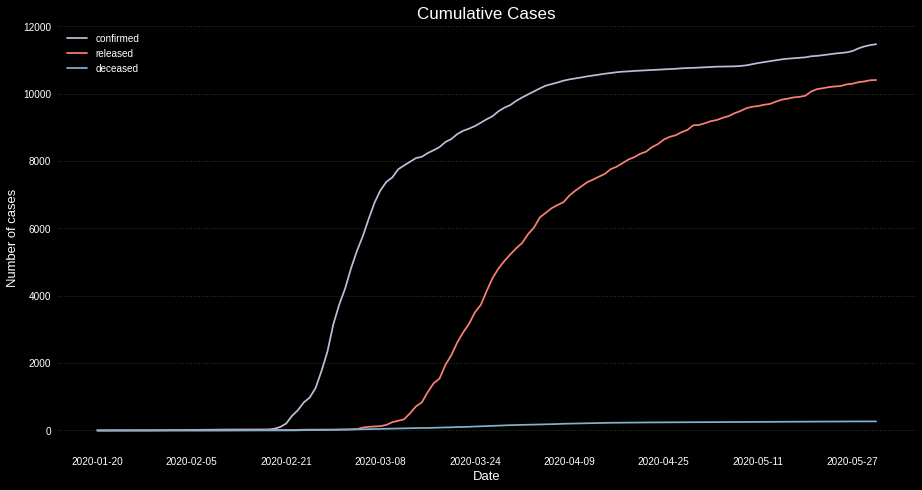

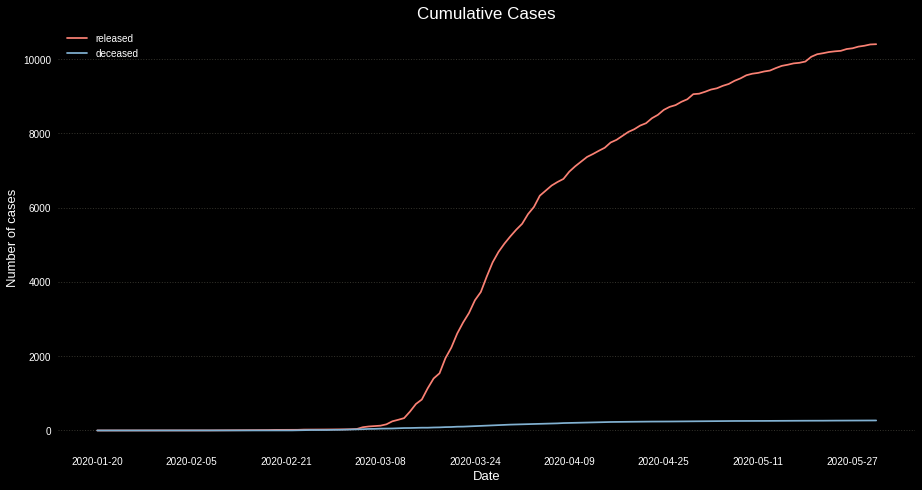

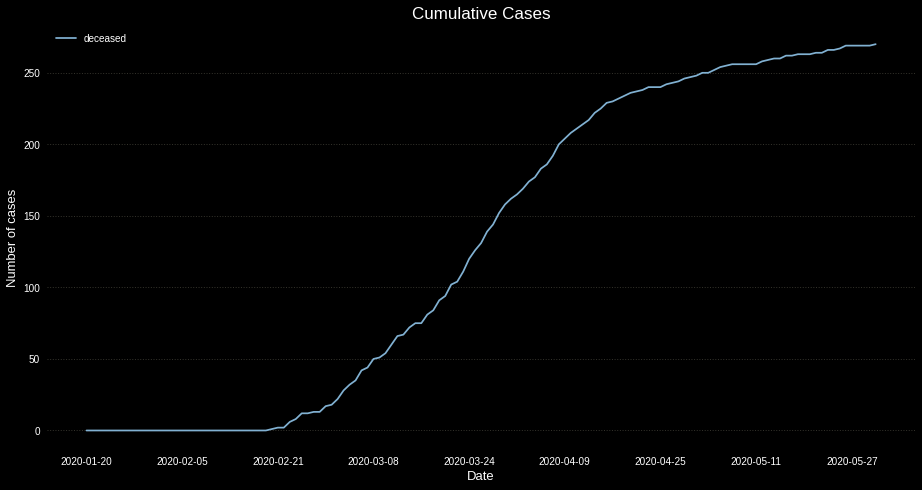

In [63]:
plot_lines(test_raw, [2, 4, 5, 6], 7, 'Cumulative Cases')

# Columns for daily new cases added


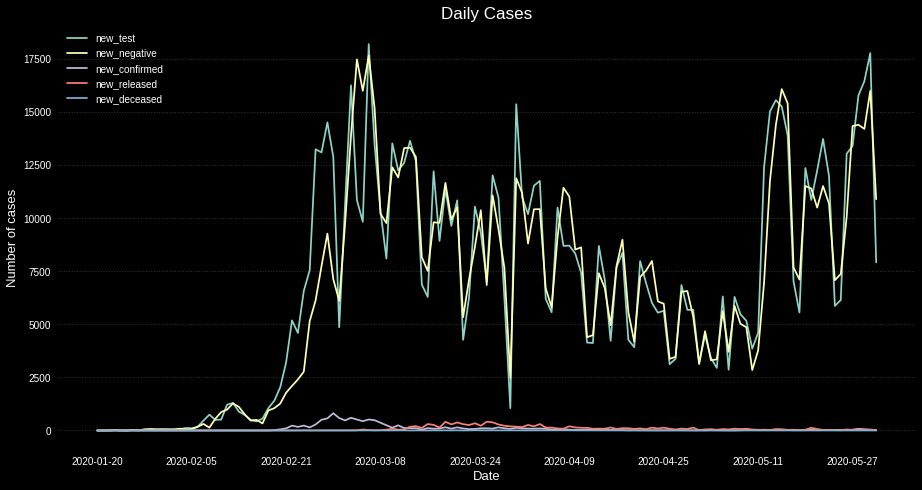

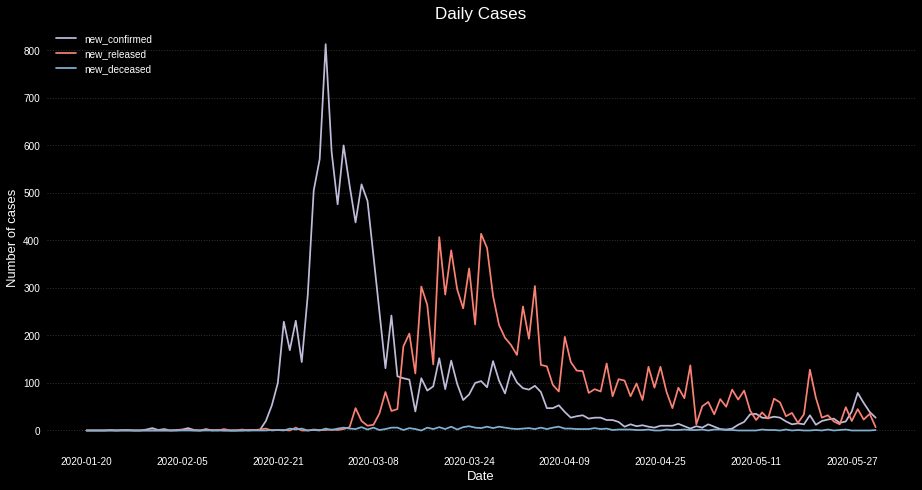

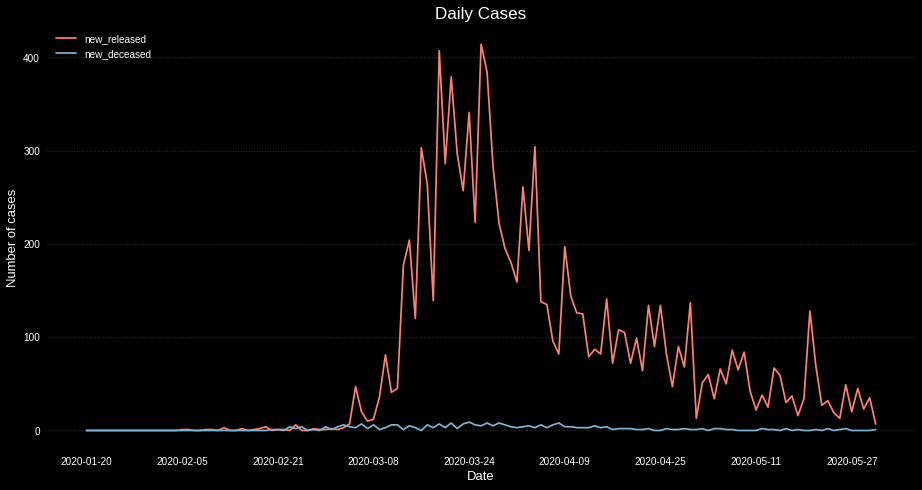

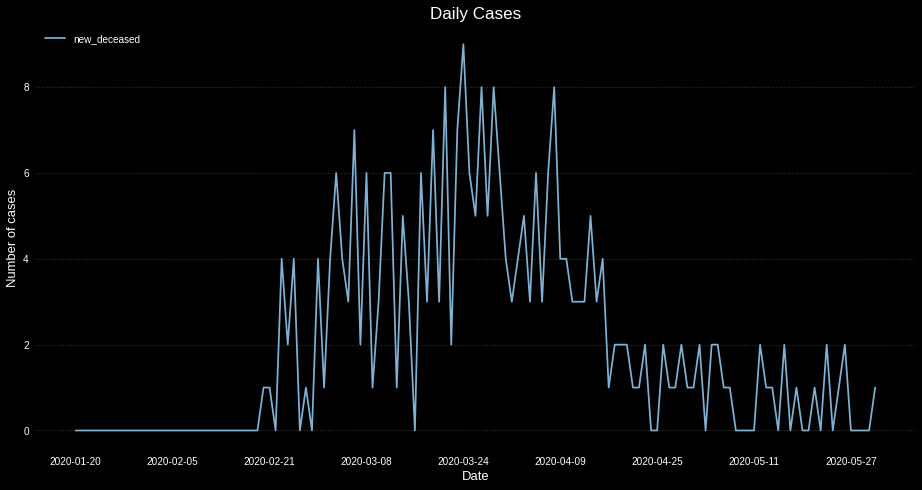

In [64]:
print('# Columns for daily new cases added')
for col in test_raw.columns[2:7]:
    if col in [2, 4]:
        new_dict = {0: 1}
    else:
        new_dict = {0: 0}
    new_dict.update({ i : test_raw[col][i] - test_raw[col][i-1] for i in range(1, len(test_raw)) })
    test_raw[f'new_{col}'] = new_dict.values()

plot_lines(test_raw, [7, 9, 10, 11], 12, 'Daily Cases')

# Columns for rates added


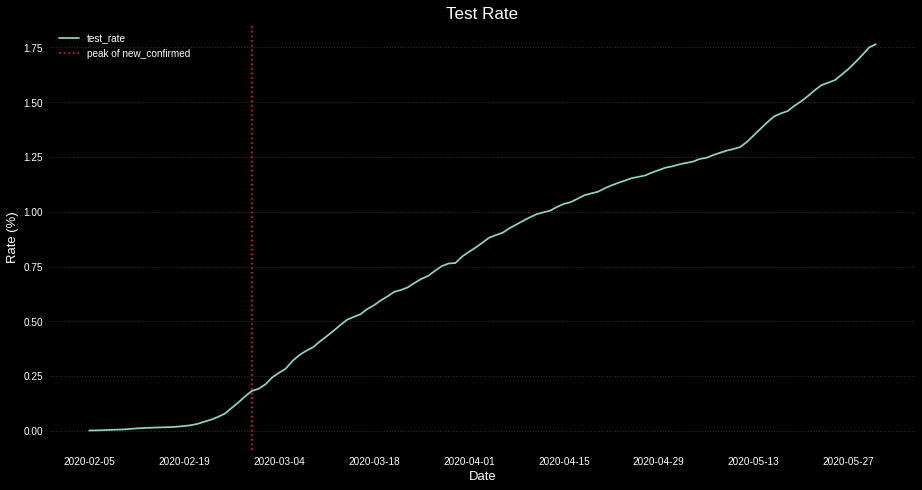

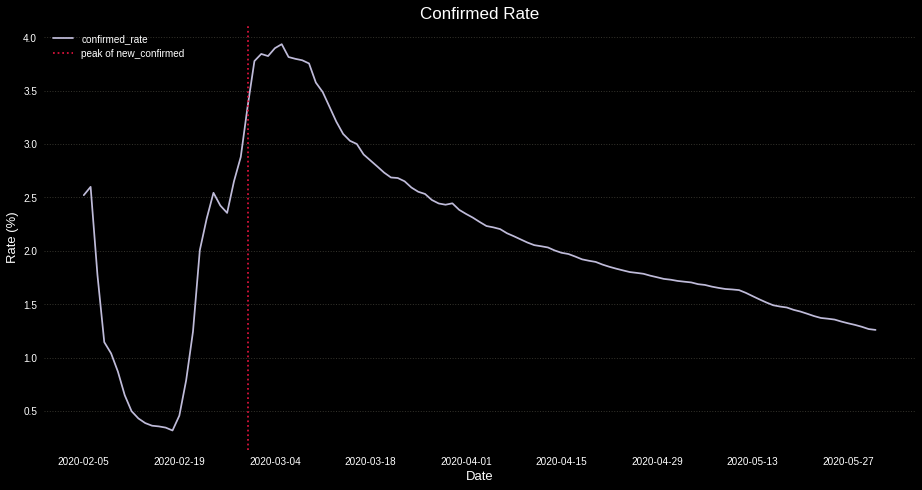

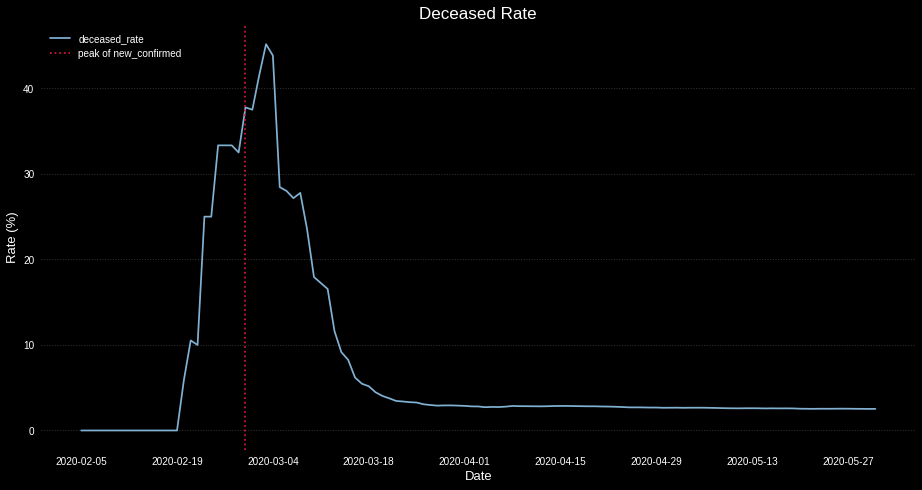

In [65]:
## 1. Add rate columns
total_pop = sum(pop_meta.population)*1000000
test_raw['test_rate'] = test_raw.test/total_pop * 100
test_raw['confirmed_rate'] = test_raw.confirmed/test_raw.test * 100 # to total tests
test_raw['deceased_rate'] = test_raw.deceased/(test_raw.released+test_raw.deceased) * 100 # to released or deceased cases
print('# Columns for rates added')

## 2. Plot rates by day
start_day = np.nanargmin(test_raw.deceased_rate)
peak_day = np.argmax(test_raw.new_confirmed)
for i, j in zip(np.arange(len(test_raw.columns)-3, len(test_raw.columns))
                , ['Test Rate', 'Confirmed Rate', 'Deceased Rate']):
    fig, ax = plt.subplots(figsize=(13, 7))
    plt.plot(test_raw.date[start_day:]
             , test_raw[test_raw.columns[i]][start_day:]
             , color=color_list[(i-(len(test_raw.columns)-3))*2])
    plt.title(j, size=17)
    ax.axvline(test_raw.date[peak_day]
               , ls=':', color='crimson')
    ax.set_xlabel('Date', size=13)
    ax.set_ylabel('Rate (%)', size=13)
    ax.set_xticks(ax.get_xticks()[::int(len(test_raw.date[start_day:])/8)])
    ax.legend([test_raw.columns[i], 'peak of new_confirmed']
              , loc='upper left')
    plt.show()

In [69]:
path_raw = get_data(file_paths[5])
print(f'Number of unique paths: {len(path_raw.infection_case.unique())}\n')
print('[6 paths with the most confirmed cases]')
path = path_raw.sort_values('confirmed', ascending=False)
display(path.head(6))

[Sample data]


case_id province             city  group        infection_case  \
0    1000001    Seoul       Yongsan-gu   True         Itaewon Clubs   
1    1000002    Seoul          Guro-gu   True   Guro-gu Call Center   
2    1000003    Seoul    Dongdaemun-gu   True         Dongan Church   
125  7000002  Jeju-do                -  False  contact with patient   
126  7000003  Jeju-do                -  False                   etc   
127  7000004  Jeju-do  from other city   True         Itaewon Clubs   

     confirmed   latitude   longitude  
0        133.0  37.538621  126.992652  
1         99.0  37.508163  126.884387  
2         20.0  37.592888  127.056766  
125        0.0          -           -  
126        4.0          -           -  
127        1.0          -           -

Number of unique paths: 51

[6 paths with the most confirmed cases]


case_id          province             city  group        infection_case  \
29   1200001             Daegu           Nam-gu   True    Shincheonji Church   
37   1200009             Daegu                -  False  contact with patient   
38   1200010             Daegu                -  False                   etc   
102  6000001  Gyeongsangbuk-do  from other city   True    Shincheonji Church   
16   1000017             Seoul                -  False       overseas inflow   
75   2000010       Gyeonggi-do                -  False       overseas inflow   

     confirmed  latitude longitude  
29      4510.0  35.84008  128.5667  
37       920.0         -         -  
38       737.0         -         -  
102      566.0         -         -  
16       346.0         -         -  
75       252.0         -         -

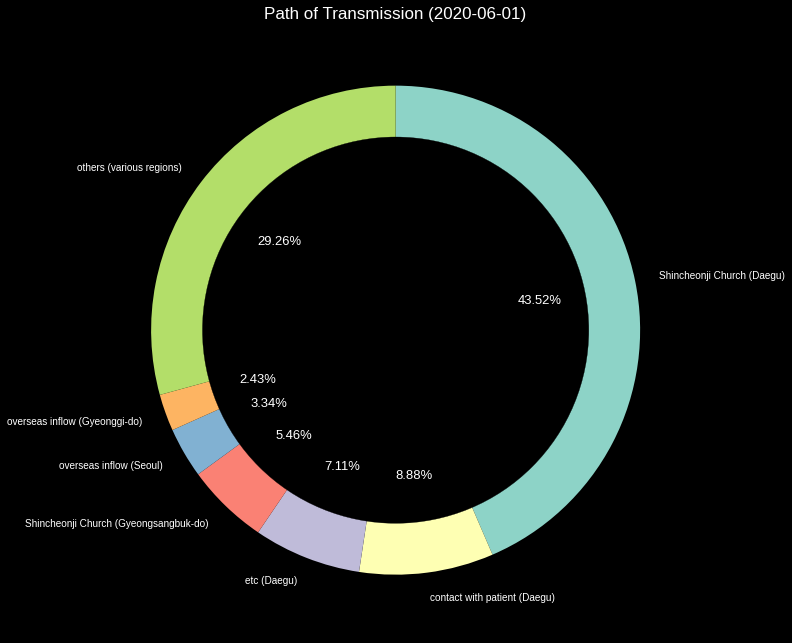

In [70]:
# Put paths other than those with the 6 most confirmed cases into others
path.loc[len(path), :] = path[path.confirmed<path.confirmed.iloc[5]].sum()
path.loc[len(path)-1, 'case_id'] = 0
path.loc[len(path)-1, 'province'] = 'various regions'
path.loc[len(path)-1, 'city'] = 'various cities'
path.loc[len(path)-1, 'group'] = 'various groups'
path.loc[len(path)-1, 'infection_case'] = 'others'
path.loc[len(path)-1, 'latitude'] = '-'
path.loc[len(path)-1, 'longitude'] = '-'
path_with_others = path[path.confirmed >= path.confirmed.iloc[5]]

# Plot distribution
fig, ax = plt.subplots(figsize=(11, 11))
plt.title(f'Path of Transmission ({last_update})', fontsize=17)
pop_circle=plt.Circle((0,0), 0.79, color='black')
plt.pie(path_with_others.confirmed, autopct='%.2f%%'
        , labels=path_with_others.infection_case + ' (' + path_with_others.province + ')'
#         , explode=(0.03, 0, 0, 0, 0, 0, 0)
        , startangle=90
        , counterclock=False)
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

In [71]:
path_group = path_raw.groupby('group').sum().sort_values('confirmed', ascending=False)
path_group.index = ['group', 'individual']
print('[Type of transmission]')
path_group


[Type of transmission]


case_id  confirmed
group       212300354     7174.0
individual  154300329     3190.0

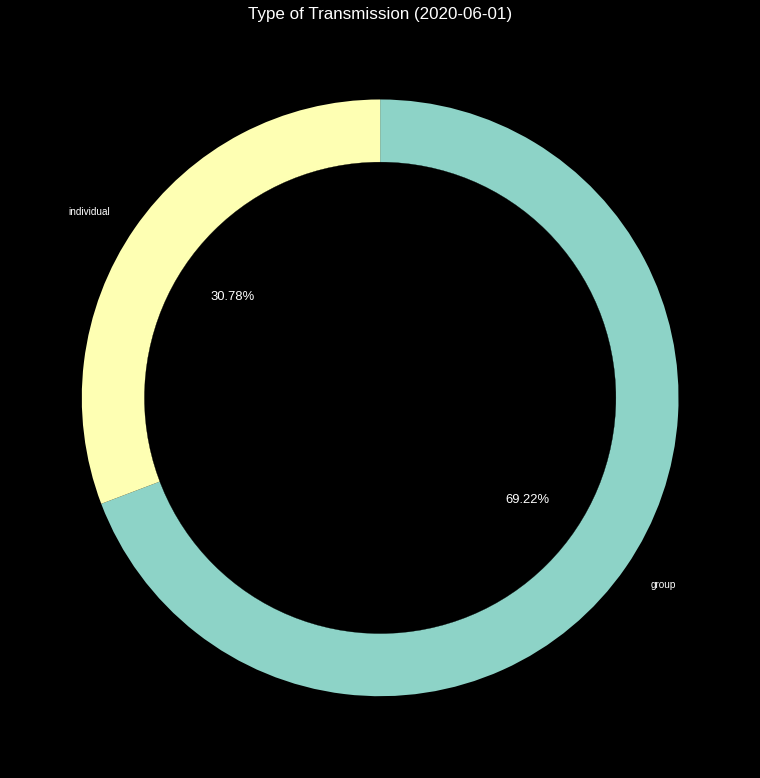

In [72]:
fig, ax = plt.subplots(figsize=(11, 11))
plt.title(f'Type of Transmission ({last_update})', fontsize=17)
pop_circle=plt.Circle((0,0), 0.79, color='black')
plt.pie(path_group.confirmed
        , autopct='%.2f%%'
        , labels=path_group.index
        , startangle=90
        , counterclock=False)
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

In [79]:
weather_raw = get_data(file_paths[6], transpose=True)
data_range(weather_raw, 'date')

[Sample data]


0           1           2                 25804  \
code                        10000       11000       12000             60000   
province                    Seoul       Busan       Daegu  Gyeongsangbuk-do   
date                   2016-01-01  2016-01-01  2016-01-01        2020-05-31   
avg_temp                      1.2         5.3         1.7              18.5   
min_temp                     -3.3         1.1          -4              11.2   
max_temp                        4        10.9           8              24.7   
precipitation                   0           0           0                 0   
max_wind_speed                3.5         7.4         3.7                 5   
most_wind_direction            90         340         270               180   
avg_relative_humidity          73        52.1        70.5              77.4   

                                  25805       25806  
code                              61000       70000  
province               Gyeongsangnam-do     Jeju-do  
date                         2020-05-31  2020-05-31  
avg_temp                           19.3        19.7  
min_temp                           14.6        17.1  
max_temp                           24.6        23.6  
precipitation                         0           0  
max_wind_speed                        4         6.2  
most_wind_direction                 140          70  
avg_relative_humidity              71.5        88.1

Date range: 1613 days
# 2016-01-01 to 2020-05-31


In [80]:
## Stats by group
print('Number of regions in weather data:', len(weather_raw.province.unique()))
print(sorted(weather_raw.province.unique()))
print()
print('Number of regions in region data:', len(region_raw.province.unique()))
print(sorted(region_raw.province.unique()))

Number of regions in weather data: 16
['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu', 'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju-do', 'Jeollabuk-do', 'Jeollanam-do', 'Seoul', 'Ulsan']

Number of regions in region data: 17
['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu', 'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju-do', 'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan']


In [81]:
print('[Basic statistics - total]')
weather_raw.loc[:,'avg_temp':].describe().T

[Basic statistics - total]


count        mean         std   min   25%    50%  \
avg_temp               25792.0   13.693052    9.519496 -14.8   5.9   14.3   
min_temp               25802.0    9.495438    9.899467 -19.2   1.3    9.7   
max_temp               25804.0   18.611552    9.580450 -11.9  10.7   19.5   
precipitation          25807.0    1.412508    7.991702   0.0   0.0    0.0   
max_wind_speed         25798.0    5.116776    2.022527   1.0   3.8    4.7   
most_wind_direction    25778.0  196.026457  106.427142  20.0  90.0  230.0   
avg_relative_humidity  25787.0   65.553496   17.234220  10.4  53.4   66.6   

                         75%    max  
avg_temp                21.7   33.9  
min_temp                17.9   30.3  
max_temp                26.6   40.0  
precipitation            0.0  266.0  
max_wind_speed           6.0   29.4  
most_wind_direction    290.0  360.0  
avg_relative_humidity   78.6  100.0

In [85]:
print('[Average weather by region - sample]')
weather_stat = weather_raw.loc[:, 'province':].groupby('province').mean()
weather_stat.tail(3).T

[Average weather by region - sample]


province               Jeollanam-do       Seoul       Ulsan
avg_temp                  14.753379   12.840546   14.290329
min_temp                  11.799876    8.634594   10.075883
max_temp                  18.354123   17.845161   19.050899
precipitation              1.647799    1.393614    1.482145
max_wind_speed             7.980100    4.525574    4.697830
most_wind_direction      183.099814  209.422360  258.561686
avg_relative_humidity     65.073945   57.565840   66.006014

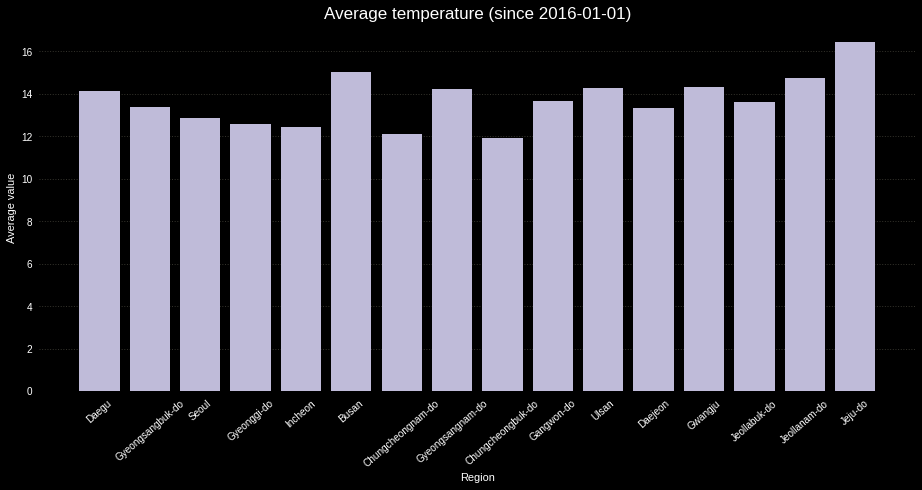

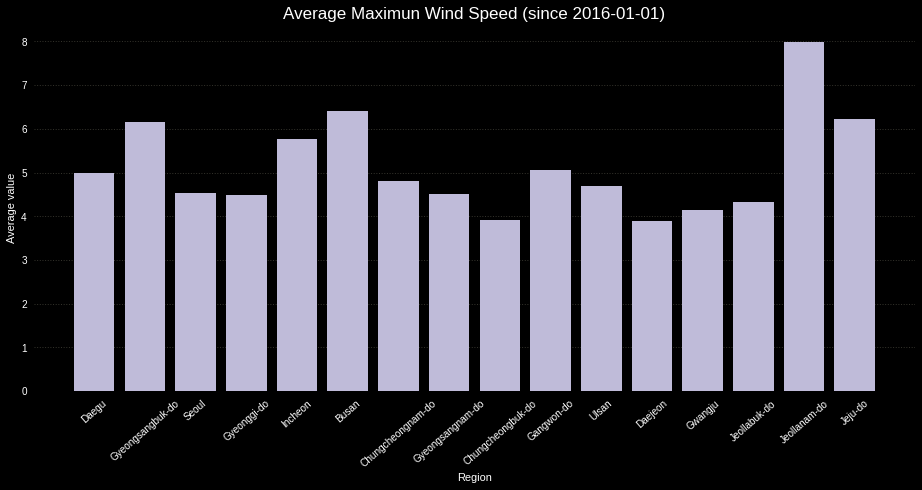

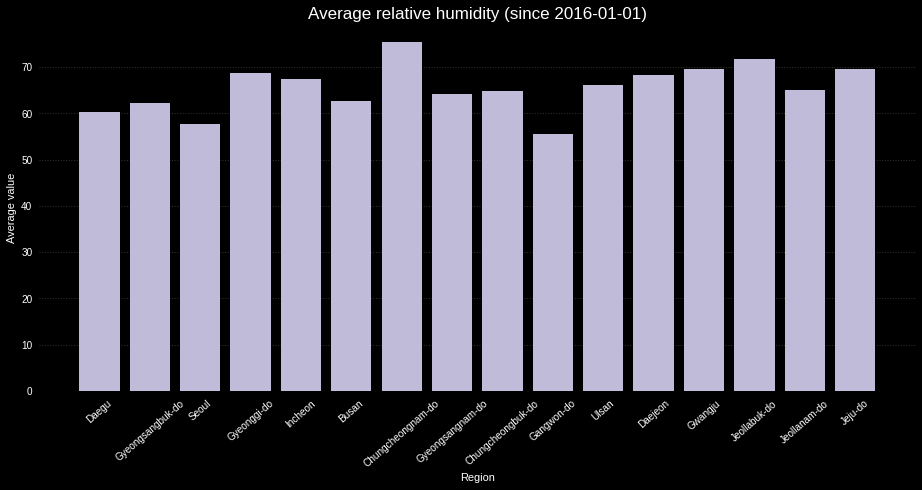

In [86]:
weather_avg = pd.DataFrame(
    [weather_stat.index
     , weather_stat['avg_temp']
     , weather_stat['precipitation']
     , weather_stat['max_wind_speed']
     , weather_stat['avg_relative_humidity']]
    ).T
weather_avg.columns = ['region', 'temperature', 'precipitation'
                       , 'max_wind_speed', 'relative_humidity']

sorter = list(pop_meta.region[pop_meta.region != 'Sejong'].values)
weather_avg.region = weather_avg.region.astype('category')
weather_avg.region.cat.set_categories(sorter, inplace=True)
weather_avg = weather_avg.sort_values(['region'])
weather_avg.index = range(len(weather_raw.province.unique()))

title_list = ['Average temperature', 'Average Maximun Wind Speed', 'Average relative humidity']
for col, title in zip(weather_avg.columns[[1, 3, 4]], title_list):
    plt.figure(figsize=(13, 7))
    plt.title(f'{title} (since 2016-01-01)', fontsize=17)
    plt.xticks(rotation=41)
    plt.bar(weather_avg.region, weather_avg[col], color=color_list[2])
    plt.xlabel('Region')
    plt.ylabel('Average value')
    plt.show()

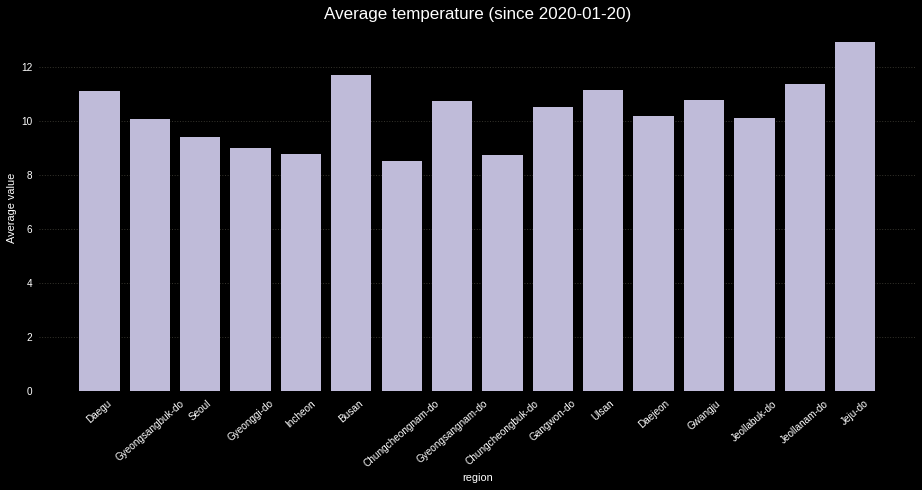

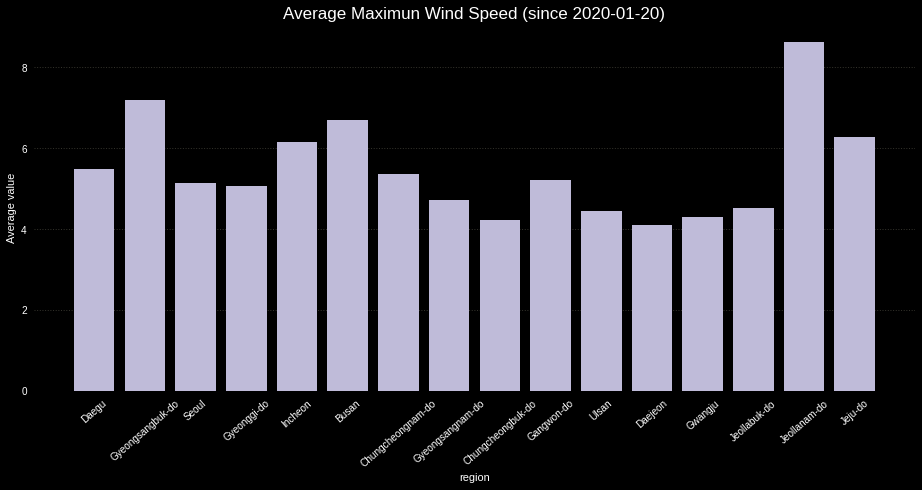

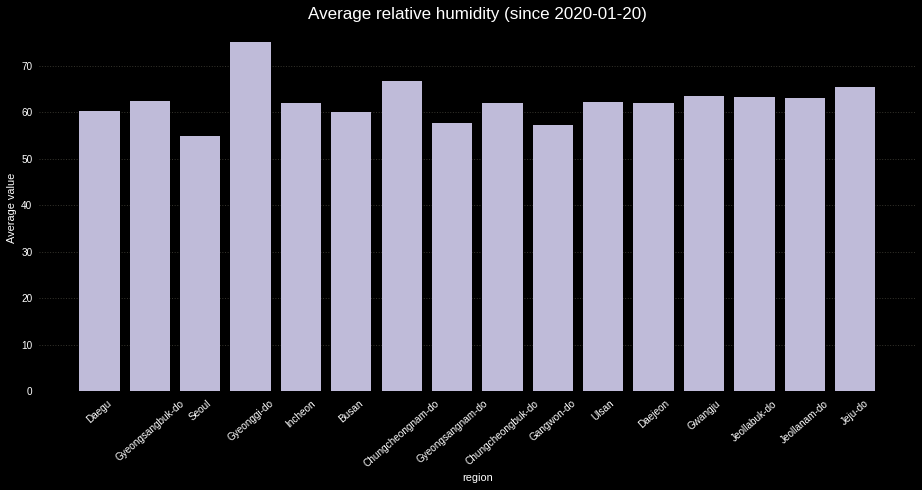

In [87]:
## 1. Create a dataframe
weather_covid = weather_raw[weather_raw.date >= '2020-01-20']
weather_cov_stat = weather_covid.loc[:, 'province':].groupby('province').mean()
weather_cov_avg = pd.DataFrame(
    [weather_cov_stat.index
     , weather_cov_stat['avg_temp']
     , weather_cov_stat['precipitation']
     , weather_cov_stat['max_wind_speed']
     , weather_cov_stat['avg_relative_humidity']]
    ).T

## 2, Order by confirmed cases
weather_cov_avg.columns = ['region', 'temperature', 'precipitation'
                           , 'max_wind_speed', 'relative_humidity']
weather_cov_avg.region = weather_cov_avg.region.astype('category')
weather_cov_avg.region.cat.set_categories(sorter, inplace=True)
weather_cov_avg = weather_cov_avg.sort_values(['region'])

## 3. Plot values
title_list = ['Average temperature', 'Average Maximun Wind Speed', 'Average relative humidity']
for col, title in zip(weather_cov_avg.columns[[1, 3, 4]], title_list):    
    plt.title(f'{title} (since 2020-01-20)', fontsize=17)
    plt.xticks(rotation=41)
    plt.bar(weather_avg.region, weather_cov_avg[col], color=color_list[2])
    plt.xlabel('region')
    plt.ylabel('Average value')
    plt.show()

In [88]:
print('[Datasets we\'ve been through]')
[ i[:-4] for i in file_names ]

[Datasets we've been through]


['TimeAge',
 'TimeProvince',
 'Region',
 'TimeGender',
 'Time',
 'Case',
 'Weather',
 'PatientInfo',
 'PatientRoute',
 'SeoulFloating',
 'SearchTrend',
 'Policy']

In [90]:
## 1. Get data on global confirmed cases and fatalities (which are more recent than test_raw)
test_global = pd.read_csv('/home/spark/바탕화면/BigData_Analysis/Project/dataset/train.csv')
## 2. Pick relevant rows and columns
daily_korea_raw = [0, 0, 0]
daily_korea_raw = test_global[ (test_global.Country_Region=='Korea, South') 
                              & (test_global.Target=='ConfirmedCases') 
                              & (test_global.Date>='2020-01-20') 
                             ].loc[ :, ['Date', 'TargetValue'] ]

In [92]:
## 1. Get data on search trends
search_korea_raw = pd.read_csv('/home/spark/바탕화면/BigData_Analysis/Project/dataset/search_southkorea.csv')
## 2. Cleanse nulls and insignificant values
search_korea_raw = search_korea_raw.dropna()
search_korea_raw = search_korea_raw.replace('<1', 0) # <1 means less than 1 significance in raw data
## 3. Convert object to float
search_korea_raw.iloc[:, 1:-2] = search_korea_raw.iloc[:, 1:-2].astype(float)
## 4. Make a new column by merging 5 sub-columns for COVID-19 search on google
search_korea_raw['google(all)'] = search_korea_raw.iloc[:, 1:-1].sum(axis=1)
search_korea_raw['google(all)'] = search_korea_raw['google(all)']/max(search_korea_raw['google(all)']) * 100 # normalizing

## 5. Match lengths between search & case datasets
if len(search_korea_raw) < len(daily_korea_raw):
    daily_korea = daily_korea_raw[:len(search_korea_raw)]
    search_korea = search_korea_raw[3:]
else:
    daily_korea = daily_korea_raw
    search_korea = search_korea_raw[3:3+len(daily_korea)]
daily_korea.index = range(len(daily_korea))
search_korea.index = range(len(search_korea))
print('[Sample data]')
display(search_korea.head(3).append(search_korea.tail(3)))
# 6. Get X, y
shorter_len = min(len(search_korea), len(daily_korea))
X_google = search_korea['google(all)'][:shorter_len]
X_naver = search_korea['naver(all)'][:shorter_len]
y = daily_korea.TargetValue.values[:shorter_len]
date_range = daily_korea.Date[:shorter_len]
# X_google, X_naver, y = np.log(X_google+1), np.log(X_naver+1), np.log(y+1) # log version

[Sample data]


Day  corona  corona virus  covid  covid19  corona(Kor)  \
0    2020-01-23     1.0           1.0    0.0      0.0          4.0   
1    2020-01-24     1.0           2.0    0.0      0.0          6.0   
2    2020-01-25     1.0           3.0    0.0      0.0          8.0   
132  2020-06-03     1.0           0.0    1.0      0.0         14.0   
133  2020-06-04     1.0           0.0    1.0      0.0         13.0   
134  2020-06-05     1.0           0.0    1.0      0.0         12.0   

     naver(all)  google(all)  
0       0.97466     5.084746  
1       1.51068     7.627119  
2       1.35777    10.169492  
132     8.43412    13.559322  
133     7.72815    12.711864  
134     7.34759    11.864407

No handles with labels found to put in legend.


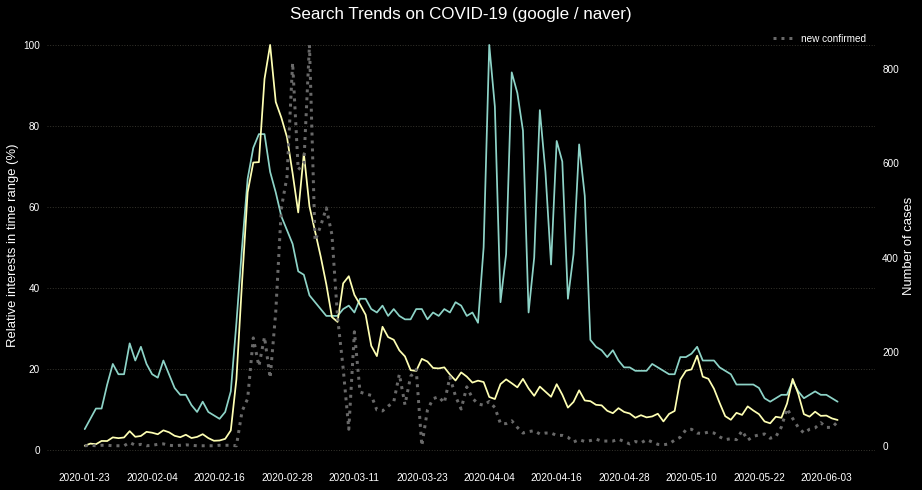

In [93]:
fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('Search Trends on COVID-19 (google / naver)', size=17)

ax1.plot(date_range, X_google)
ax1.plot(date_range, X_naver)
ax1.set_xticks(ax1.get_xticks()[::int(len(date_range)/11)])
ax1.set_ylabel('Relative interests in time range (%)', size=13)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel("Number of cases", size=13)
ax2.plot(date_range, y
         , label='new confirmed'
         , color='dimgray'
         , ls=':'
         , lw=3)
ax2.set_xticks(ax2.get_xticks()[::int(len(date_range)/11)])
ax2.legend(loc='upper right')

plt.show()

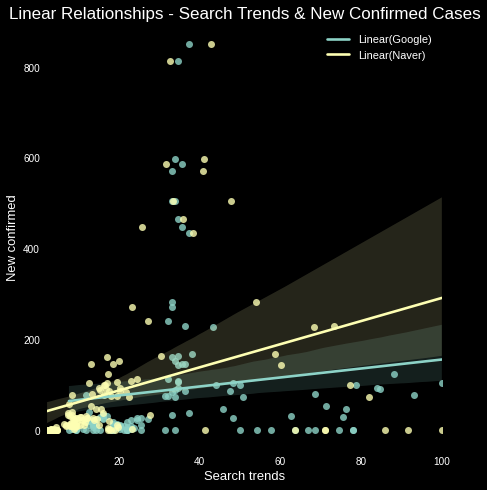

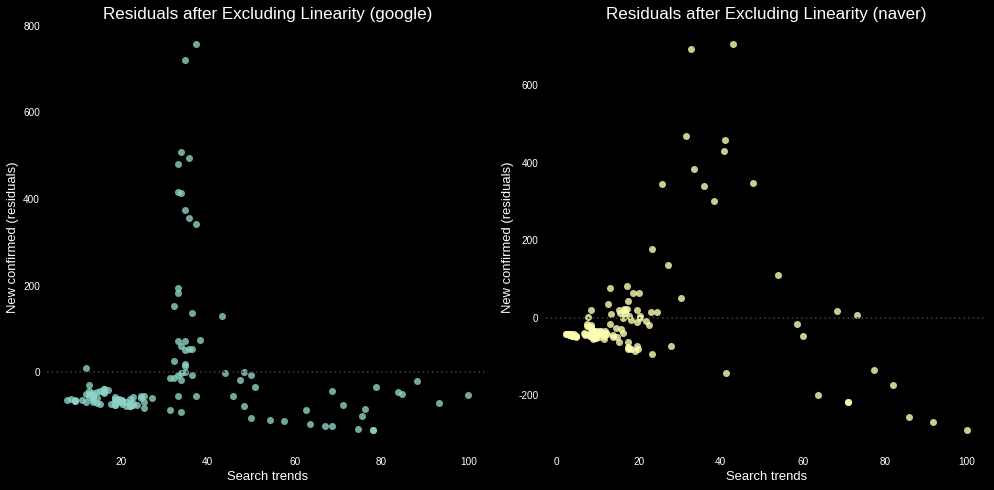

In [94]:
## 1. Linear relationship
# 1) Get time-gaps between search trends and confirmed cases empirically 
gap_google = np.argmax(y) - np.argmax(X_google[:50])
gap_naver = np.argmax(y) - np.argmax(X_naver)
# 2) Plot regressions on scatter points
plt.figure(figsize=(7, 7))
plt.title('Linear Relationships - Search Trends & New Confirmed Cases', size=17)
plt.grid(False)
sns.regplot(X_google[gap_google:len(X_google)]
           , y[:len(X_google)-gap_google])
sns.regplot(X_naver[gap_naver:len(X_naver)]
           , y[:len(X_naver)-gap_naver])
plt.xlabel('Search trends', size=13)
plt.ylabel('New confirmed', size=13)
plt.legend(['Linear(Google)', 'Linear(Naver)'
           ], fontsize=11)
plt.show()

## 2. Residuals - Google
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
axes[0].set_title('Residuals after Excluding Linearity (google)', size=17)
sns.residplot(X_google[gap_google:len(X_google)]
              , y[:len(X_google)-gap_google]
              , ax=axes[0])
axes[0].grid(False)
axes[0].set_xlabel('Search trends', size=13)
axes[0].set_ylabel('New confirmed (residuals)', size=13)
# plt.show()

## 3. Residuals - Naver
plt.title('Residuals after Excluding Linearity (naver)', size=17)
sns.residplot(X_naver[gap_naver:len(X_naver)]
              , y[:len(X_naver)-gap_naver]
              , color=color_list[1]
              , ax=axes[1])
axes[1].grid(False)
axes[1].set_xlabel('Search trends', size=13)
axes[1].set_ylabel('New confirmed (residuals)', size=13)
plt.show()

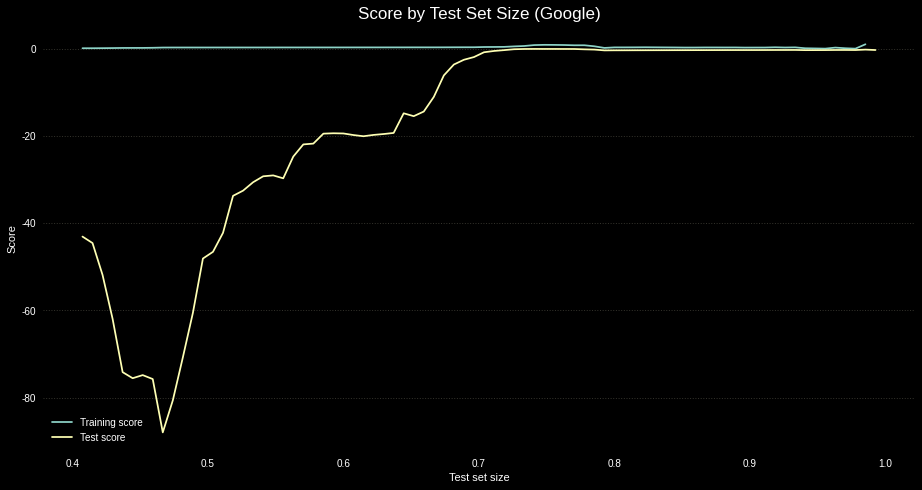

Best training score: 1.0000 (test set size=0.99)
Best test score: -0.0650 (test set size=0.74)


In [95]:
size_range = np.arange(55, len(y))
_, _, pred_g, best_score_g, best_size_g = test_with_range_ts(X_google, y, LinearRegression(), size_range, 'Google');



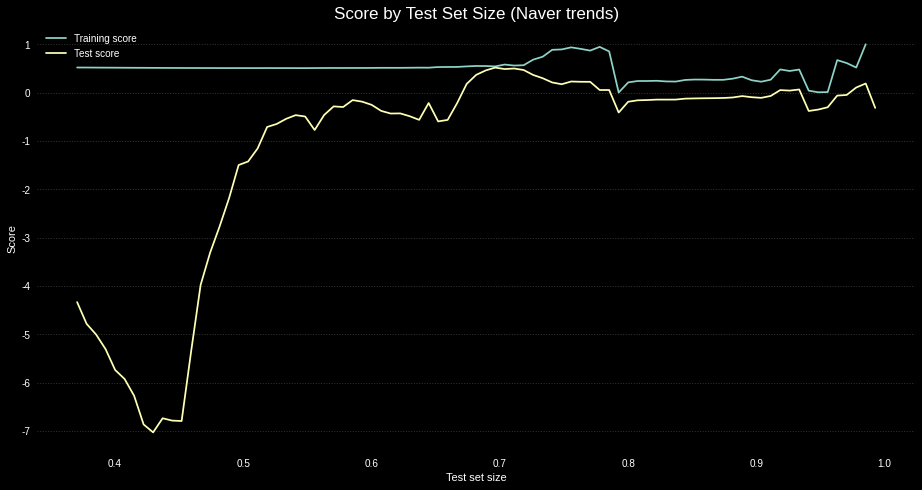

Best training score: 1.0000 (test set size=0.99)
Best test score: 0.5178 (test set size=0.70)


In [96]:
size_range = np.arange(50, len(y))
_, _, pred_n, best_score_n, best_size_n = test_with_range_ts(X_naver, y, LinearRegression(), size_range, 'Naver trends');


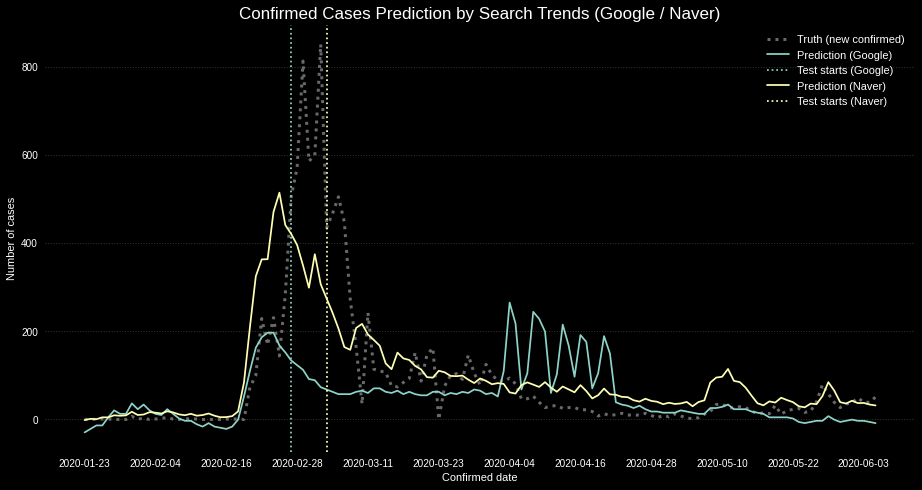

In [97]:
test_start_g, test_start_n = len(search_korea.Day)-best_size_g, len(search_korea.Day)-best_size_n

fig, ax = plt.subplots(figsize=(13, 7))
plt.plot(search_korea.Day, y, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(search_korea.Day, pred_g)
ax.axvline(search_korea.Day[test_start_g], ls=':', color=color_list[0])
plt.plot(search_korea.Day, pred_n)
ax.axvline(search_korea.Day[test_start_n], ls=':', color=color_list[1])
ax.set_xticks(ax.get_xticks()[::int(len(search_korea.Day)/11)])
plt.title('Confirmed Cases Prediction by Search Trends (Google / Naver)', size=17)
ax.legend(['Truth (new confirmed)'
           , 'Prediction (Google)'
           , 'Test starts (Google)'
           , 'Prediction (Naver)'
           , 'Test starts (Naver)'
           ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()


In [98]:
print(f'[R2 score in testing]\nGoogle: %.4f\nNaver: %.4f'
      %(r2_score(y[test_start_g:], pred_g[test_start_g:])
        , r2_score(y[test_start_n:], pred_n[test_start_n:])))


[R2 score in testing]
Google: -0.0650
Naver: 0.5178


In [99]:
print('[Sample data] Google + Naver')
X_all = search_korea.iloc[:, -2:]
X_all.head(3).append(X_all.tail(3))

[Sample data] Google + Naver


naver(all)  google(all)
0       0.97466     5.084746
1       1.51068     7.627119
2       1.35777    10.169492
132     8.43412    13.559322
133     7.72815    12.711864
134     7.34759    11.864407

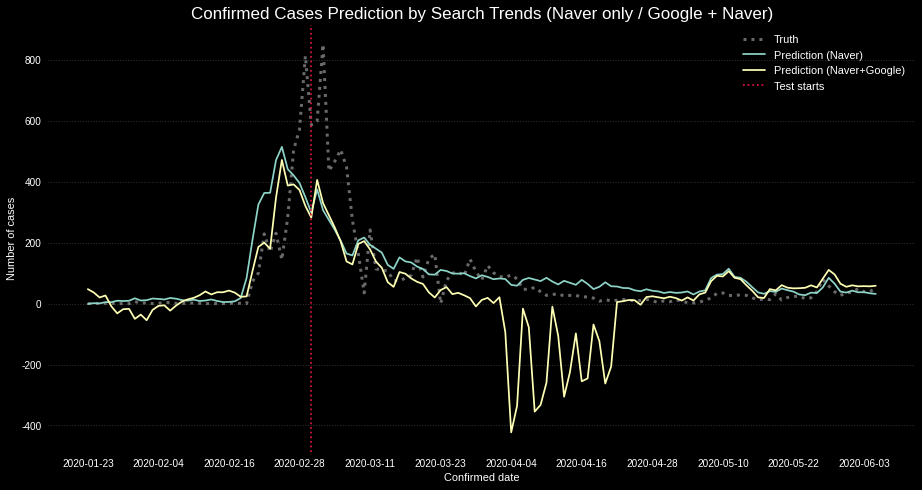

[R2 score in testing]
Naver: 0.5737
Google + Naver: -0.1189


In [100]:
## 1. Split X into train / test sets
best_size = int((best_size_g + best_size_n)/2)
test_start = len(search_korea.Day)-best_size
X_train, y_train, X_test, y_test = X_all.iloc[:test_start, :], y[:test_start], X_all.iloc[test_start:, :], y[test_start:]

## 2. Fit / Predict
lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
pred_all = np.concatenate([train_pred, test_pred])

## 3. Plot predictions / truths
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Confirmed Cases Prediction by Search Trends (Naver only / Google + Naver)', size=17)
plt.plot(search_korea.Day, y, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(search_korea.Day, pred_n)
plt.plot(search_korea.Day, pred_all)
ax.axvline(search_korea.Day[test_start], ls=':', color='crimson')
ax.set_xticks(ax.get_xticks()[::int(len(search_korea.Day)/11)])
ax.legend(['Truth'
           , 'Prediction (Naver)'
           , 'Prediction (Naver+Google)'
           , 'Test starts'
          ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

## 4. Check scores
print(f'[R2 score in testing]\nNaver: %.4f\nGoogle + Naver: %.4f'
      %(r2_score(y[test_start:], pred_n[test_start:])
        , r2_score(y[test_start:], pred_all[test_start:])))

# All negative predictions converted to 0
Minium value in prediction: 0.0


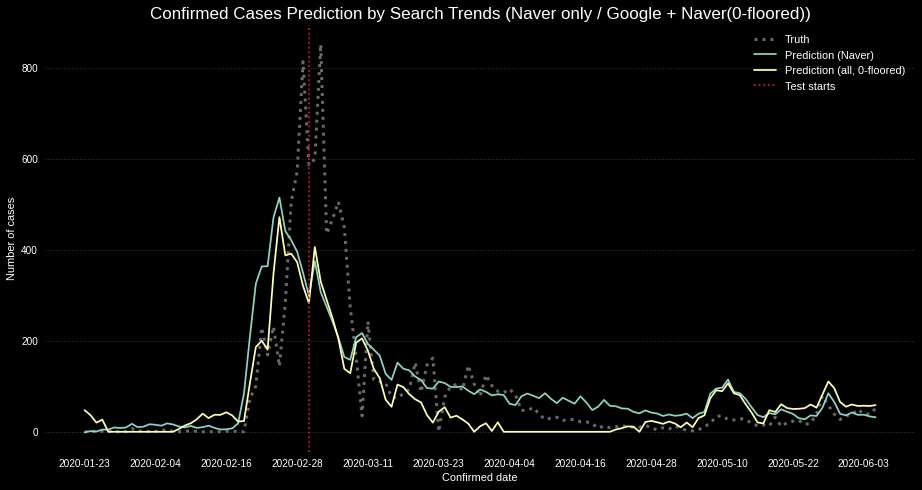

[R2 score in testing]
Naver: 0.5737
Google + Naver(0-floored): 0.5489


In [101]:
## 1. 0-flooring negative predictions
print('# All negative predictions converted to 0')
pred_all[pred_all < 0] = 0
print('Minium value in prediction:', min(pred_all))

## 2. Plot predictions
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Confirmed Cases Prediction by Search Trends (Naver only / Google + Naver(0-floored))', size=17)
plt.plot(search_korea.Day, y, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(search_korea.Day, pred_n)
plt.plot(search_korea.Day, pred_all)
ax.axvline(search_korea.Day[test_start], ls=':', color='crimson')
ax.set_xticks(ax.get_xticks()[::int(len(search_korea.Day)/11)])
ax.legend(['Truth'
           , 'Prediction (Naver)'
           , 'Prediction (all, 0-floored)'
           , 'Test starts'
          ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

## 3. Check scores
print(f'[R2 score in testing]\nNaver: %.4f\nGoogle + Naver(0-floored): %.4f'
      %(r2_score(y[test_start:], pred_n[test_start:])
        , r2_score(y[test_start:], pred_all[test_start:])))

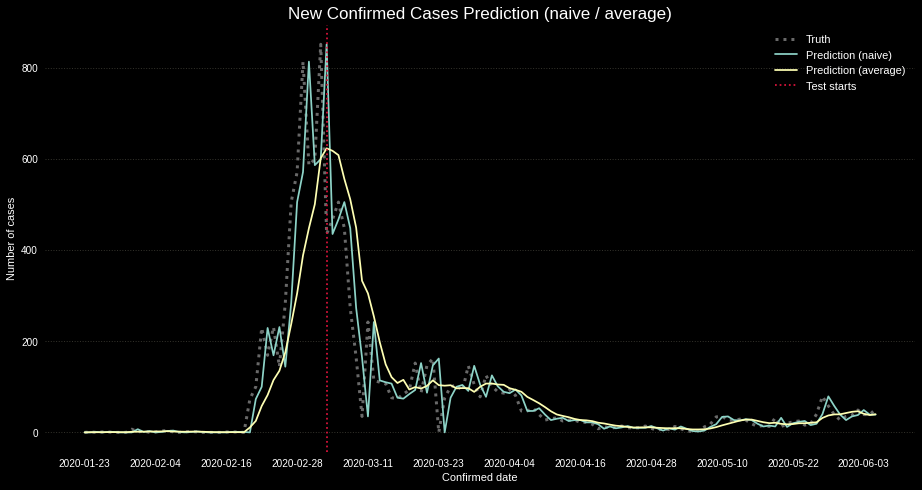

[R2 score in testing]
naive: 0.5989
average: 0.5772


In [102]:
## 0. Reset starting point
best_size = best_size_n
test_start = len(search_korea.Day)-best_size

## 1. Naive
pred_naive = [0] # dynamic all the time
# pred_naive = list(y[:best_size_n]) + list(np.ones(len(y) - best_size_n) * y[best_size_n-1]) # static with the last observation before testing
# pred_naive = list(y[:best_size_n]) + [ y[i-1] for i in np.arange(best_size_n, len(y)) ] # dynamic in testing
[ pred_naive.append(y[i-1]) for i in np.arange(1, len(y)) ]

## 2. Moving average of (up to) 7 latest observations
avg_window = 7
pred_avg_former = [ y[0:i].mean() for i in np.arange(1, avg_window) ]
pred_avg_latter = [ y[i-avg_window:i].mean() for i in np.arange(avg_window, len(y)+1) ]
pred_avg = pred_avg_former + pred_avg_latter

## 3. Plot predictions
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('New Confirmed Cases Prediction (naive / average)', size=17)
plt.plot(search_korea.Day, y, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(search_korea.Day, pred_naive)
plt.plot(search_korea.Day, pred_avg)
ax.axvline(search_korea.Day[test_start], ls=':', color='crimson')
ax.set_xticks(ax.get_xticks()[::int(len(search_korea.Day)/11)])
ax.legend(['Truth'
           , 'Prediction (naive)'
           , 'Prediction (average)'
           , 'Test starts'
          ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

## 4. Check scores
print(f'[R2 score in testing]\nnaive: %.4f\naverage: %.4f'
      %(
          r2_score(y[-best_size_n:], pred_naive[-best_size_n:])
        , r2_score(y[-best_size_n:], pred_avg[-best_size_n:])
       ))

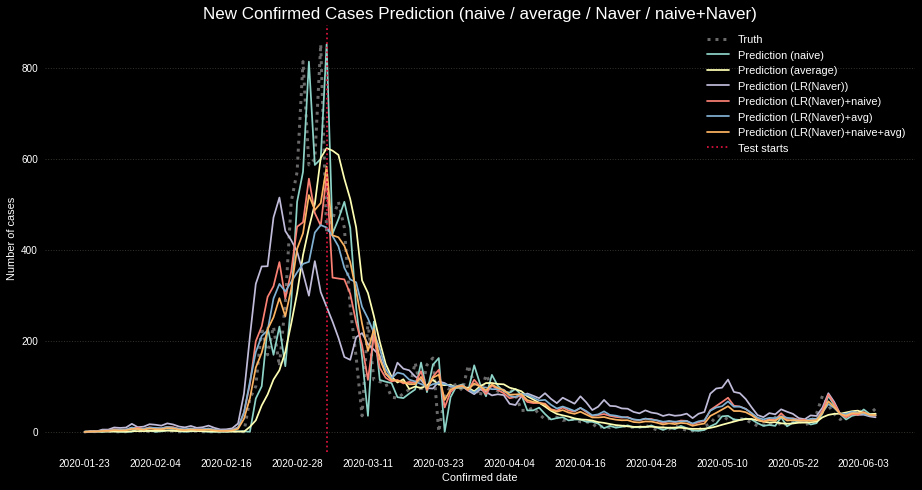

[R2 score in testing]        
Naive: 0.5989        
Average: 0.5772        
LR(Naver): 0.5178        
LR(Naver) + Naive: 0.7816        
LR(Naver) + Average: 0.7944        
LR(Naver) + Naive + Average: 0.8092


In [103]:
## 1. Ensemble models
pred_fusion = (np.array(pred_naive) + np.array(pred_n))/2
pred_fusion_avg = (np.array(pred_avg) + np.array(pred_n))/2
pred_fusion_all = (np.array(pred_avg) + np.array(pred_naive) + np.array(pred_n))/3

## 2. Compare all predictions
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('New Confirmed Cases Prediction (naive / average / Naver / naive+Naver)', size=17)
plt.plot(search_korea.Day, y, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(search_korea.Day, pred_naive)
plt.plot(search_korea.Day, pred_avg)
plt.plot(search_korea.Day, pred_n)
plt.plot(search_korea.Day, pred_fusion)
plt.plot(search_korea.Day, pred_fusion_avg)
plt.plot(search_korea.Day, pred_fusion_all)
ax.axvline(search_korea.Day[test_start], ls=':', color='crimson')
ax.set_xticks(ax.get_xticks()[::int(len(search_korea.Day)/11)])
ax.legend(['Truth'
           , 'Prediction (naive)'
           , 'Prediction (average)'
           , 'Prediction (LR(Naver))'
           , 'Prediction (LR(Naver)+naive)'
           , 'Prediction (LR(Naver)+avg)'
           , 'Prediction (LR(Naver)+naive+avg)'
           , 'Test starts'
          ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

## 3. Check scores
print(f'[R2 score in testing]\
        \nNaive: {round( r2_score(y[-best_size_n:], pred_naive[-best_size_n:]), 4 )}\
        \nAverage: {round( r2_score(y[-best_size_n:], pred_avg[-best_size_n:]), 4 )}\
        \nLR(Naver): {round( r2_score(y[-best_size_n:], pred_n[-best_size_n:]), 4 )}\
        \nLR(Naver) + Naive: {round( r2_score(y[-best_size_n:], pred_fusion[-best_size_n:]), 4 )}\
        \nLR(Naver) + Average: {round( r2_score(y[-best_size_n:], pred_fusion_avg[-best_size_n:]), 4 )}\
        \nLR(Naver) + Naive + Average: {round( r2_score(y[-best_size_n:], pred_fusion_all[-best_size_n:]), 4 )}')

## 4. Save the best prediction as a benchmark
bench_korea = pred_fusion_all

In [105]:
## 1. Get data
search_germany = pd.read_csv('/home/spark/바탕화면/BigData_Analysis/Project/dataset/search_germany.csv')
## 2. Cleanse nulls and insignificant values
search_germany = search_germany.dropna()
search_germany = search_germany.replace('<1', 0) # <1 means less than 1 significance in raw data
## 3. Convert object to float
search_germany.iloc[:, 1:-2] = search_germany.iloc[:, 1:-2].astype(float)
## 4. Get a new column by merging 5 sub-columns for COVID-19 search on Google
search_germany['google(all)'] = search_germany.iloc[:, 1:-1].sum(axis=1)
search_germany['google(all)'] = search_germany['google(all)']/max(search_germany['google(all)']) * 100 # normalizing

search_all = search_germany[:len(test_raw)] # match lengths with test_raw

print('[Search Trends in Germany - sample]')
search_germany.head(3).append(search_germany.tail(3))


[Search Trends in Germany - sample]


Day  corona: (Germany)  coronavirus: (Germany) covid19: (Germany)  \
0    2020-01-27                2.0                     6.0                  0   
1    2020-01-28                4.0                    14.0                  0   
2    2020-01-29                3.0                    11.0                  0   
128  2020-06-03               19.0                     0.0                  1   
129  2020-06-04               20.0                     0.0                  1   
130  2020-06-05               18.0                     0.0                  1   

    covid: (Germany)  google(all)  
0                  0     5.479452  
1                  0    12.328767  
2                  0     9.589041  
128                0    13.013699  
129                0    13.698630  
130                0    12.328767

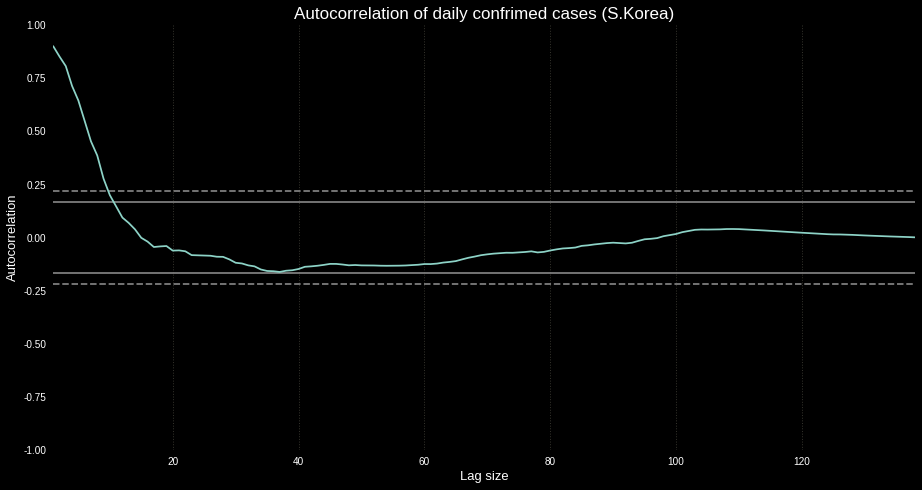

In [106]:
acplot(daily_korea.TargetValue)
plt.title('Autocorrelation of daily confrimed cases (S.Korea)', size=17)
plt.xlabel('Lag size', size=13)
plt.ylabel('Autocorrelation', size=13)
plt.show()



# ARIMA model fitted
[Parameters]
p(AR part): 10, d(I part): 1, q(MA part): 0


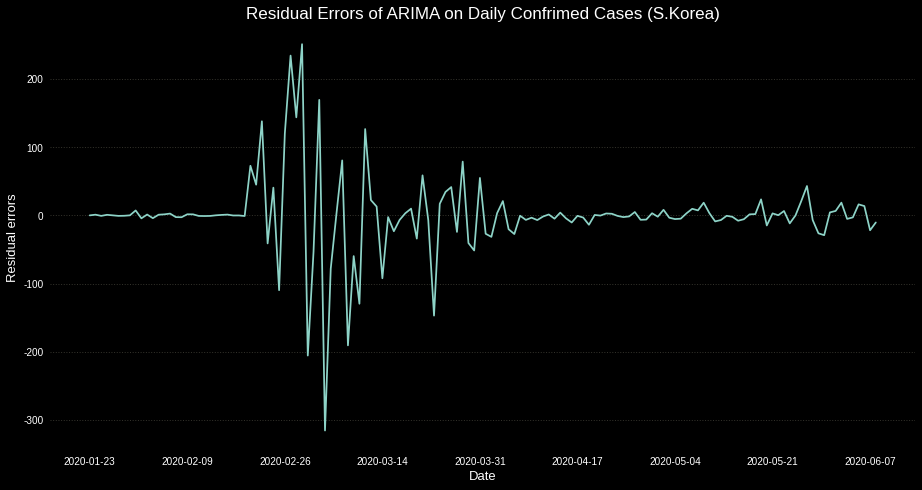

In [107]:
p, d, q = 10, 1, 0
date_list = daily_korea.Date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
arima = ARIMA(daily_korea.TargetValue
              , dates= date_list
              , order=(p, d, q)
              , freq="D").fit()
print(f'# ARIMA model fitted\n[Parameters]\np(AR part): {p}, d(I part): {d}, q(MA part): {q}')

fig, ax = plt.subplots(figsize=(13, 7))
plt.plot(daily_korea.Date, arima.resid)
plt.title('Residual Errors of ARIMA on Daily Confrimed Cases (S.Korea)', size=17)
plt.xlabel('Date', size=13)
plt.ylabel('Residual errors', size=13)
ax.set_xticks(ax.get_xticks()[::int(len(daily_korea.Date)/8)])
plt.show()

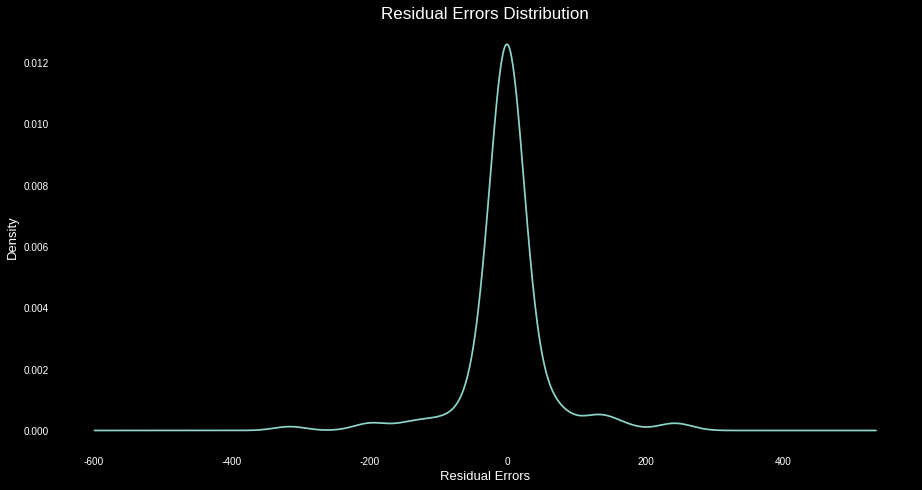

[Basic statistics]
count    138.000000
mean       0.298699
std       61.543425
min     -315.687107
25%       -6.706896
50%       -0.397813
75%        4.780716
max      251.194344
dtype: float64


In [108]:
## 1. Check distribution of residual errors
arima.resid.plot(kind='kde'
                 , grid=False)
plt.title('Residual Errors Distribution', size=17)
plt.xlabel('Residual Errors', size=13)
plt.ylabel('Density', size=13)
plt.show()
## 2. Check statistics
print('[Basic statistics]')
print(arima.resid.describe())

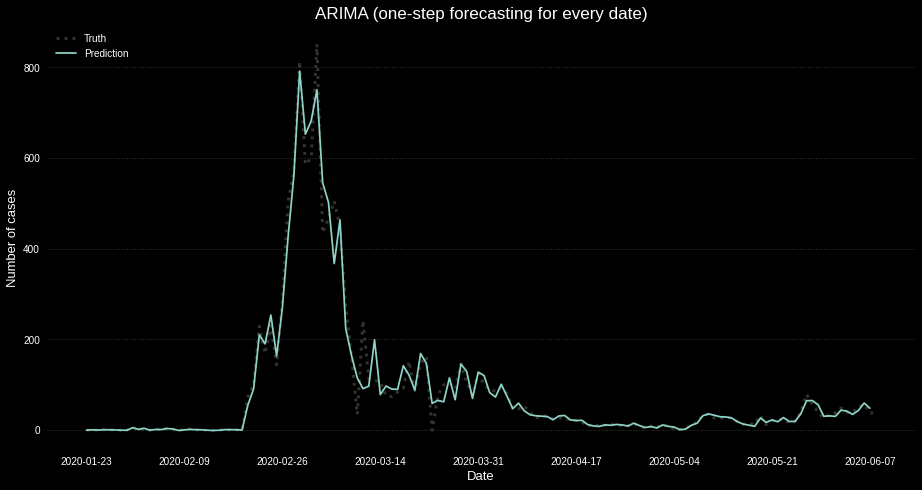

rmse        mae      mape
score  29.207157  13.336777  0.625311

- RMSE: Root Mean Sqaure Error    
- MAE: Mean Absolute Error    
- MAPE: Mean Absolute Percentage Error      


In [109]:
## 1. Overlap predictions(+1 step to the last observation) onto the truth
fig, ax = plt.subplots(figsize=(13, 7))

plt.plot(daily_korea.Date
         , daily_korea.TargetValue
         , color='#33322B', ls=':' , lw=3)
plt.plot(daily_korea.Date[:-1]
        , arima.predict()[1:])
plt.title('ARIMA (one-step forecasting for every date)', size=17)
plt.xlabel('Date', size=13)
plt.ylabel('Number of cases', size=13)
ax.set_xticks(ax.get_xticks()[::int(len(daily_korea.Date)/8)])
plt.legend(['Truth', 'Prediction'], loc='upper left')
plt.show()

## 2. Check scores
diff, rmse, mae, mape = diff_metrics(daily_korea.TargetValue[:-1], arima.predict()[1:])
scores = pd.DataFrame(
    {'rmse': rmse
     , 'mae': mae
     , 'mape': mape}
    , index=['score']
)
display(scores)
print('- RMSE: Root Mean Sqaure Error\
    \n- MAE: Mean Absolute Error\
    \n- MAPE: Mean Absolute Percentage Error\
      ')

/home/spark/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


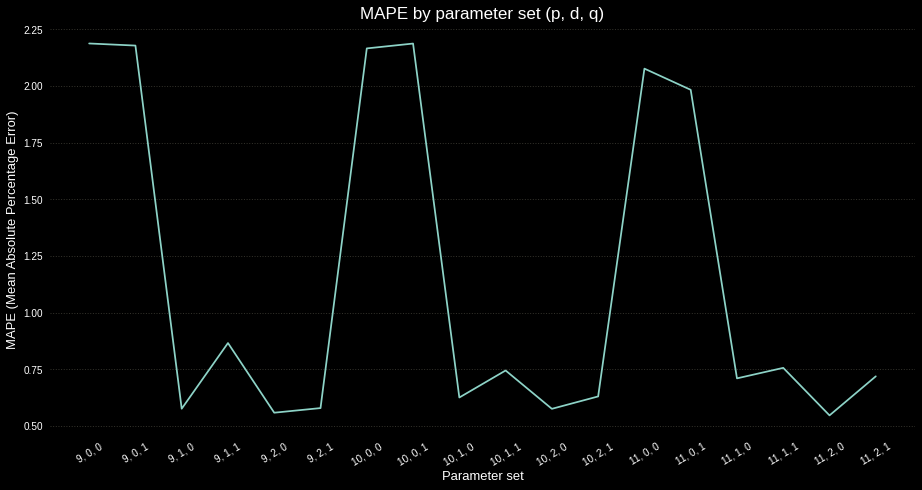

Minium MAPE: 0.5464 by 11, 2, 0 (p, d, q)


In [110]:
p, d, q = 10, 1, 0
param_list, mape_list = arima_grid(daily_korea, p, d, q, 1);
print(f'Minium MAPE: {round(min(mape_list), 4)} by {param_list[np.argmin(mape_list)]} (p, d, q)')


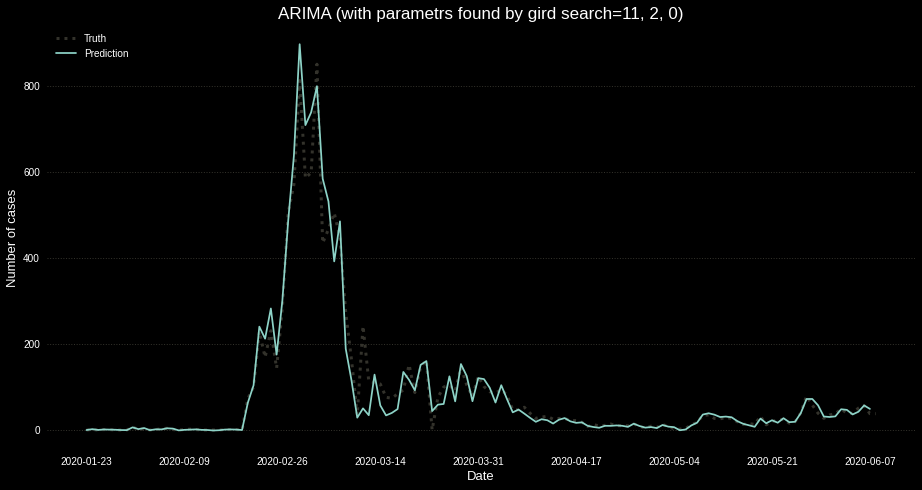

rmse        mae     mape
score  34.954381  16.296871  0.54644

In [111]:
## 1. Apply best parameter set
arima = ARIMA(daily_korea.TargetValue
              , dates=date_list
              , order=(11, 2, 0)
              , freq="D").fit()
arima_pred = arima.predict()

## 2. Overlap predictions(+1 step to the last observation) onto the truth
fig, ax = plt.subplots(figsize=(13, 7))

plt.plot(daily_korea.Date
         , daily_korea.TargetValue
         , color='#33322B', ls=':' , lw=3)
plt.plot(daily_korea.Date[:-1]
        , arima.predict()[1:])
plt.title('ARIMA (with parametrs found by gird search=11, 2, 0)', size=17)
plt.xlabel('Date', size=13)
plt.ylabel('Number of cases', size=13)
ax.set_xticks(ax.get_xticks()[::int(len(daily_korea.Date)/8)])
plt.legend(['Truth', 'Prediction'], loc='upper left')
plt.show()

## 3. Check scores
diff_grid, rmse_grid, mae_grid, mape_grid = diff_metrics(daily_korea.TargetValue[:-1], arima.predict()[1:])
scores = pd.DataFrame(
    {'rmse': rmse_grid
     , 'mae': mae_grid
     , 'mape': mape_grid}
    , index=['score']
)
scores

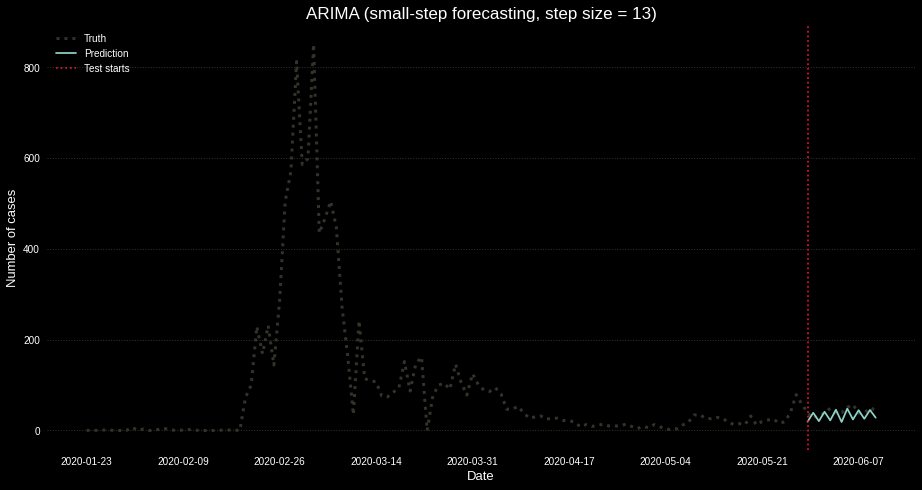

# All predictions before test are same as truth


rmse        mae      mape
score  16.416869  13.795402  0.321719

In [112]:
## 1. Set test set(step) size as the difference between daily_korea and its raw version
test_size = 13

## 2. Copy date for updating the rolled predictions by ARIMA as the new truth
daily_korea_pred = copy.deepcopy(daily_korea[:-test_size])
daily_korea_pred.Date = daily_korea_pred.Date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

## 3. Roll ARIMA test_size times to utilize the previous predictions as pseudo truths
for i in range(test_size):
    arima = ARIMA(daily_korea_pred.TargetValue
                  , dates=daily_korea_pred.Date
                  , order=(11, 2, 0)
                  , freq="D").fit()
    arima_pred = arima.predict()
    daily_korea_pred.loc[len(daily_korea_pred)] = (daily_korea_pred.Date.values[-1] + timedelta(1)
                                                   , arima_pred.values[-1])

## 4. Compare predictions with truths (from daily_korea_raw)
fig, ax = plt.subplots(figsize=(13, 7))
plt.plot(daily_korea_raw.Date
         , daily_korea_raw.TargetValue
         , color='#33322B', ls=':' , lw=3)
plt.plot(daily_korea_raw.Date[-test_size:], 
         daily_korea_pred[-test_size:].TargetValue)
plt.title(f'ARIMA (small-step forecasting, step size = {test_size})', size=17)
plt.xlabel('Date', size=13)
plt.ylabel('Number of cases', size=13)
ax.set_xticks(ax.get_xticks()[::int(len(daily_korea.Date)/8)])
ax.axvline(daily_korea_raw.Date.values[-test_size], ls=':', color='crimson')
plt.legend(['Truth', 'Prediction', 'Test starts'], loc='upper left')
plt.show()
print('# All predictions before test are same as truth')
## 5. Check scores
diff_small, rmse_small, mae_small, mape_small = diff_metrics(daily_korea_raw.TargetValue[-test_size:]
                                                             , daily_korea_pred.TargetValue[-test_size:])
scores = pd.DataFrame(
    {'rmse': rmse_small
     , 'mae': mae_small
     , 'mape': mape_small}
    , index=['score']
)
display(scores)